In [1]:
from deriva.core import DerivaServer, get_credential
from deriva.chisel import Model, Schema, Table, Column, Key, ForeignKey, builtin_types
from deriva.chisel.util import graph, describe
import pandas
from pandas import DataFrame
from IPython.display import display
import numpy as N

def ddescribe(obj):
    display(describe(obj))
    printLine()

def dgraph(obj):
    display(graph(obj))
    printLine()

def describe_graph(obj):
    display(describe(obj))
    g = graph(obj)
    g.view()
    #display(g)
    printLine()
    
def getTableData(schema, table, dataframe=True):
    datapath = catalog.getPathBuilder()
    table_ = datapath.schemas[schema].tables[table]
    data = table_.path.entities()
    data.fetch()
    print("\nNumber of entries", len(data), "\n")
    if dataframe:
        return DataFrame(data)
    else:
        return data

def addTableData(schema, table, new_entries):
    datapath = catalog.getPathBuilder()
    table_ = datapath.schemas[schema].tables[table]
    entities = table_.insert(new_entries)
    return list(entities)
    
def updateTableData(schema, table, update_entries):
    datapath = catalog.getPathBuilder()
    table_ = datapath.schemas[schema].tables[table]
    entities = table_.update(update_entries)
    return

'''
def deleteTableData(schema, table, update_entries):
    datapath = catalog.getPathBuilder()
    table_ = datapath.schemas["Beta_Cell"].tables["Derived_Image_Data"]
    path = table_.filter(table_.Dataset == "1-B2PM")
    path.delete()
'''
    
def printSchemaNames():
    schemas = list(datapath.schemas)
    print("Schemas:", schemas, "\n")
    printLine()

def getSchemaNames():
    schemas = list(datapath.schemas)
    print("Schemas:", schemas, "\n")
    printLine()
    return schemas
    
def printTableNames(schema):
    tables = list(datapath.schemas[schema].tables)
    print("Tables:", tables, "\n")
    printLine()
    
def getTableNames(schema):
    tables = list(datapath.schemas[schema].tables)
    print("Tables:", tables, "\n")
    printLine()
    return tables

def printColNames(schema, table):
    cols = list(datapath.schemas[schema].tables[table].column_definitions)
    print("Columns:", cols, "\n")
    printLine()

def getColNames(schema, table):
    cols = list(datapath.schemas[schema].tables[table].column_definitions)
    print("Columns:", cols, "\n")
    printLine()
    return cols

def printFKeys(schema, table):
    table_ = model.schemas[schema].tables[table]
    print("\n-- Foreign Keys --")
    for fk in table_.foreign_keys:
        fkr = fk.referenced_columns[0]
        fkc = fk.foreign_key_columns[0]
        print(fkc.table.schema.name+"."+fkc.table.name+"."+fkc.name, " --> ", fkr.table.schema.name+"."+fkr.table.name+"."+fkr.name)
    printLine()

def printKeys(schema, table):
    table_ = model.schemas[schema].tables[table]
    print("\n--Keys --")
    for k in table_.keys:
        kc = k.columns[0]
        print(kc.table.schema.name+"."+kc.table.name+"."+kc.name)
    printLine()

def getDescription(schema, table):
    print("\n----------------------- "+schema+ "."+ table+ " -----------------------\n")
    printTableNames(schema)
    printColNames(schema, table)
    dgraph(model.schemas[schema].tables[table])
    ddescribe(schema, table)
    data = getTableData(schema, table)
    pandas.set_option('display.max_rows', 8)#data.shape[0]+1)
    display(data[data.columns.difference(['RCT', 'RMB', 'RMT', 'RCB'])])

def printLine():
    for i in range(65):
        print("-", end="-")
    print("")

In [2]:
hostname = 'pbcconsortium.isrd.isi.edu'
catalog_number = 31
catalog = DerivaServer('https', hostname, credentials = get_credential(hostname)).connect_ermrest(str(catalog_number))
model = Model.from_catalog(catalog)
datapath = catalog.getPathBuilder()
done_edits = True

/home/jsingla/anaconda3/envs/chisel/lib/python3.7/site-packages/portalocker/utils.py:210: UserWarning: timeout has no effect in blocking mode
  warnings.warn('timeout has no effect in blocking mode')


In [3]:
describe_graph(model)

### List of schemas
| Name         | Comment                                                 |
|--------------|---------------------------------------------------------|
| public       | standard public schema                                  |
| data\_commons | None                                                    |
| \_acl\_admin | None                                                    |
| common       | None                                                    |
| Beta\_Cell   | None                                                    |
| viz          | None                                                    |
| Common       | None                                                    |
| vocab        | None                                                    |
| isa          | None                                                    |
| Vocab        | None                                                    |
| WWW          | Schema for tables that will be displayed as web content |


----------------------------------------------------------------------------------------------------------------------------------


In [4]:
describe_graph(model.schemas['isa'])

### List of Tables
| Schema | Name    | Kind  | Comment |
|--------|---------|-------|---------|
| isa    | project | table | domain  |
| isa    | person  | table | domain  |


----------------------------------------------------------------------------------------------------------------------------------


In [5]:
describe_graph(model.schemas['isa'].tables['project'])

### Table "isa:project"
#### Columns
| Name                 | Type        | Nullable | Default                                                       | Comment                                                                              |
|----------------------|-------------|----------|---------------------------------------------------------------|--------------------------------------------------------------------------------------|
| id                   | serial4     | False    | None                                                          | None                                                                                 |
| funding              | text        | True     | None                                                          | None                                                                                 |
| url                  | text        | True     | None                                                          | url for more information on this project on externalre site                          |
| name                 | text        | True     | None                                                          | None                                                                                 |
| abstract             | markdown    | True     | None                                                          | None                                                                                 |
| RID                  | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | System\-generated unique row ID\.                                                    |
| RCB                  | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row created by user provenance\.                                   |
| RMB                  | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row modified by user provenance\.                                  |
| RCT                  | ermrest\_rct | False    | now\(\)                                                       | System\-generated row creation timestamp\.                                           |
| RMT                  | ermrest\_rmt | False    | now\(\)                                                       | System\-generated row modification timestamp                                         |
| pis                  | text        | True     | None                                                          | List of Last Names of Principal Investigator separated by /                          |
| groups               | text        | True     | writers                                                       | Users must be a member of the referenced ACL group in order to edit project records\. |
| group\_membership\_url | text        | True     | None                                                          | URL that project members will need in order to join the group                        |
| Tag                  | text        | True     | None                                                          | None                                                                                 |
| Other\_Omics\_Link   | text        | True     | None                                                          | None                                                                                 |
| Pubmed\_Id           | text        | True     | None                                                          | None                                                                                 |

#### Keys
| Constraint Name  | Unique Columns |
|------------------|----------------|
| project\_RID\_key | RID            |
| project\_name\_key | name           |
| project\_pkey    | id             |

#### Foreign Keys
| Constraint Name     | Foreign Key Columns | Table           | Referenced Columns |
|---------------------|---------------------|-----------------|--------------------|
| project\_groups\_fkey | groups              | isa:group\_lists | name               |

#### Referenced By
| Constraint Name      | Table       | Foreign Key Columns | Referenced Columns |
|----------------------|-------------|---------------------|--------------------|
| Dataset\_Project\_FKey | isa:Dataset | Project             | id                 |



----------------------------------------------------------------------------------------------------------------------------------


In [6]:
describe_graph(model.schemas['Beta_Cell'])

### List of Tables
| Schema    | Name                         | Kind  | Comment                                                               |
|-----------|------------------------------|-------|-----------------------------------------------------------------------|
| Beta\_Cell | Plate\_Type                  | table | Type of plate requested from a culture core\.                         |
| Beta\_Cell | Plate\_Status                | table | None                                                                  |
| Beta\_Cell | Derived\_Image\_Data         | table | None                                                                  |
| Beta\_Cell | Image\_Data                  | table | Table to hold X\-Ray Tomography MRC files\.                           |
| Beta\_Cell | Process                      | table | None                                                                  |
| Beta\_Cell | Collection\_Biosample        | table | None                                                                  |
| Beta\_Cell | Cell\_Line                   | table | Table of cultured  from which specimens  will be created\.            |
| Beta\_Cell | File                         | table | None                                                                  |
| Beta\_Cell | Ingredient                   | table | None                                                                  |
| Beta\_Cell | Mass\_Spec\_Data             | table | Table to hold X\-Ray Tomography MRC files\.                           |
| Beta\_Cell | PHYRE2\_Model                | table | None                                                                  |
| Beta\_Cell | Protocol                     | table | Table containing names of Beta Cell protocols                         |
| Beta\_Cell | Protocol\_Step               | table | Defines a single step in a protocol                                   |
| Beta\_Cell | Protocol\_Step\_Additive\_Term | table | None                                                                  |
| Beta\_Cell | Protocol\_Type               | table | Table containing names of Beta Cell protocols                         |
| Beta\_Cell | Specimen                     | table | Table of biological speciments from which biosamples will be created\. |
| Beta\_Cell | PDB\_Model                   | table | None                                                                  |
| Beta\_Cell | Mesh\_Data                   | table | None                                                                  |
| Beta\_Cell | Dataset                      | table | None                                                                  |
| Beta\_Cell | Biosample                    | table | None                                                                  |
| Beta\_Cell | Experiment                   | table | None                                                                  |
| Beta\_Cell | Pride\_Project               | table | None                                                                  |
| Beta\_Cell | Pride\_Project\_Mass\_Spec\_Data | table | Association table for Pride\_Project\_Mass\_Spec\_Data                |


----------------------------------------------------------------------------------------------------------------------------------


In [7]:
describe_graph(model.schemas['Beta_Cell'].tables['Dataset'])

### Table "Beta\_Cell:Dataset"
#### Columns
| Name        | Type        | Nullable | Default                                                       | Comment |
|-------------|-------------|----------|---------------------------------------------------------------|---------|
| RID         | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT         | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT         | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB         | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB         | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Title       | text        | False    | None                                                          | None    |
| Project     | int8        | False    | None                                                          | None    |
| Description | markdown    | True     | None                                                          | None    |
| Owner       | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| Dataset\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name      | Foreign Key Columns | Table                    | Referenced Columns |
|----------------------|---------------------|--------------------------|--------------------|
| Dataset\_RCB\_fkey   | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Project\_FKey | Project             | Beta\_Cell:project       | id                 |
| Dataset\_RMB\_fkey   | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Owner\_fkey | Owner               | Beta\_Cell:Catalog\_Group | ID                 |

#### Referenced By
| Constraint Name                 | Table                        | Foreign Key Columns | Referenced Columns |
|---------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey | Beta\_Cell:Derived\_Image\_Data | Dataset             | RID                |
| Image\_Data\_Dataset\_fkey      | Beta\_Cell:Image\_Data       | Dataset             | RID                |
| File\_Dataset\_FKey             | Beta\_Cell:File              | Dataset             | RID                |
| Mass\_Spec\_Data\_Dataset\_FKey | Beta\_Cell:Mass\_Spec\_Data  | Dataset             | RID                |
| Mesh\_Data\_dataset\_fkey       | Beta\_Cell:Mesh\_Data        | dataset             | RID                |
| Biosample\_Dataset\_FKey        | Beta\_Cell:Biosample         | Dataset             | RID                |
| Experiment\_Dataset\_FKey       | Beta\_Cell:Experiment        | Dataset             | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [227]:
describe_graph(model.schemas['Beta_Cell'].tables['Files'])

### Table "Beta\_Cell:Files"
#### Columns
| Name         | Type        | Nullable | Default                                                       | Comment |
|--------------|-------------|----------|---------------------------------------------------------------|---------|
| RID          | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT          | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT          | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB          | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB          | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Description  | markdown    | True     | None                                                          | None    |
| File\_Type   | text        | True     | None                                                          | None    |
| Submitted\_On | timestamptz | True     | None                                                          | None    |
| MD5          | text        | False    | None                                                          | None    |
| Length       | int8        | False    | None                                                          | None    |
| URL          | text        | False    | None                                                          | None    |
| Filename     | text        | False    | None                                                          | None    |
| Owner        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name    | Unique Columns |
|--------------------|----------------|
| Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name           | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------|---------------------|--------------------------|--------------------|
| Image\_Data\_RCB\_fkey    | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_Owner\_fkey  | Owner               | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_File\_Type\_fkey | File\_Type          | Beta\_Cell:File\_Type\_Term | ID                 |

#### Referenced By
| Constraint Name                        | Table                   | Foreign Key Columns | Referenced Columns |
|----------------------------------------|-------------------------|---------------------|--------------------|
| Mesh\_Data\_derived\_from\_fkey        | Beta\_Cell:Mesh\_Data   | derived\_from       | RID                |
| DataTableSXT\_File\_fkey               | Beta\_Cell:SXTDataset   | File                | RID                |
| DataTableFluorescenceImaging\_File\_fkey | Beta\_Cell:FIDataset    | File                | RID                |
| Derived\_Image\_Data\_File\_ID\_fkey   | Beta\_Cell:ProcessedData | File\_ID            | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [8]:
describe_graph(model.schemas['Beta_Cell'].tables['Biosample'])

### Table "Beta\_Cell:Biosample"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| Biosample\_Dataset\_RID\_Key | Dataset, RID   |
| Biosample\_Key            | RID            |

#### Foreign Keys
| Constraint Name                   | Foreign Key Columns | Table                         | Referenced Columns |
|-----------------------------------|---------------------|-------------------------------|--------------------|
| Biosample\_RMB\_fkey              | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Specimen\_Type\_FKey   | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| Biosample\_Protocol\_FKey         | Protocol            | Beta\_Cell:Protocol           | RID                |
| Biosample\_Specimen\_FKey         | Specimen            | Beta\_Cell:Specimen           | RID                |
| Biosample\_Experiment\_Dataset\_FKey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| Biosample\_RCB\_fkey              | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Experiment\_FKey       | Experiment          | Beta\_Cell:Experiment         | RID                |
| Biosample\_Dataset\_FKey          | Dataset             | Beta\_Cell:Dataset            | RID                |
| Biosample\_Owner\_fkey            | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |

#### Referenced By
| Constraint Name                           | Table                          | Foreign Key Columns | Referenced Columns |
|-------------------------------------------|--------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_Biosample\_fkey | Beta\_Cell:Derived\_Image\_Data | Biosample, Dataset  | RID, Dataset       |
| Derived\_Image\_Data\_Biosample\_fkey     | Beta\_Cell:Derived\_Image\_Data | Biosample           | RID                |
| Image\_Data\_Dataset\_Biosample\_fkey     | Beta\_Cell:Image\_Data         | Dataset, Biosample  | Dataset, RID       |
| Image\_Data\_Biosample\_fkey              | Beta\_Cell:Image\_Data         | Biosample           | RID                |
| Collection\_Biosample\_Biosample\_fkey    | Beta\_Cell:Collection\_Biosample | Biosample           | RID                |
| Mass\_Spec\_Data\_Biosample\_FKey         | Beta\_Cell:Mass\_Spec\_Data    | Biosample           | RID                |
| Mass\_Spec\_Dataset\_RID\_FKey            | Beta\_Cell:Mass\_Spec\_Data    | Biosample, Dataset  | RID, Dataset       |
| Mesh\_Data\_biosample\_fkey               | Beta\_Cell:Mesh\_Data          | biosample           | RID                |
| model\_biosample\_fkey                    | Beta\_Cell:model               | biosample           | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [9]:
describe_graph(model.schemas['Beta_Cell'].tables['Image_Data'])

### Table "Beta\_Cell:Image\_Data"
#### Columns
| Name            | Type        | Nullable | Default                                                       | Comment                                                      |
|-----------------|-------------|----------|---------------------------------------------------------------|--------------------------------------------------------------|
| RID             | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                         |
| RCT             | ermrest\_rct | False    | now\(\)                                                       | None                                                         |
| RMT             | ermrest\_rmt | False    | now\(\)                                                       | None                                                         |
| RCB             | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                         |
| RMB             | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                         |
| Dataset         | text        | False    | None                                                          | None                                                         |
| Description     | markdown    | True     | None                                                          | None                                                         |
| File\_Type      | text        | True     | None                                                          | None                                                         |
| Submitted\_On   | timestamptz | True     | None                                                          | None                                                         |
| File\_Id        | int4        | True     | None                                                          | None                                                         |
| Biosample       | ermrest\_rid | True     | None                                                          | Biosample from which this X Ray Tomography data was obtained |
| MD5             | text        | False    | None                                                          | None                                                         |
| Length          | int8        | False    | None                                                          | None                                                         |
| URL             | text        | False    | None                                                          | None                                                         |
| Filename        | text        | False    | None                                                          | None                                                         |
| Owner           | text        | True     | None                                                          | None                                                         |
| Experiment\_Type | text        | True     | None                                                          | None                                                         |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Image\_Data\_RID\_key      | RID            |
| Image\_Data\_RID\_Dataset\_key | RID, Dataset   |

#### Foreign Keys
| Constraint Name                   | Foreign Key Columns | Table                          | Referenced Columns |
|-----------------------------------|---------------------|--------------------------------|--------------------|
| Image\_Data\_RCB\_fkey            | RCB                 | Beta\_Cell:ERMrest\_Client     | ID                 |
| Image\_Data\_Dataset\_Biosample\_fkey | Dataset, Biosample  | Beta\_Cell:Biosample           | Dataset, RID       |
| Image\_Data\_Dataset\_fkey        | Dataset             | Beta\_Cell:Dataset             | RID                |
| Image\_Data\_Owner\_fkey          | Owner               | Beta\_Cell:ERMrest\_Client     | ID                 |
| Image\_Data\_Experiment\_Type\_fkey | Experiment\_Type    | Beta\_Cell:Experiment\_Type\_Term | ID                 |
| Image\_Data\_File\_Type\_fkey     | File\_Type          | Beta\_Cell:File\_Type\_Term    | ID                 |
| Image\_Data\_Biosample\_fkey      | Biosample           | Beta\_Cell:Biosample           | RID                |

#### Referenced By
| Constraint Name                    | Table                        | Foreign Key Columns | Referenced Columns |
|------------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Image\_Data\_fkey | Beta\_Cell:Derived\_Image\_Data | Image\_Data         | RID                |
| Mesh\_Data\_derived\_from\_fkey    | Beta\_Cell:Mesh\_Data        | derived\_from       | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [10]:
describe_graph(model.schemas['Beta_Cell'].tables['Derived_Image_Data'])

### Table "Beta\_Cell:Derived\_Image\_Data"
#### Columns
| Name       | Type        | Nullable | Default                                                       | Comment |
|------------|-------------|----------|---------------------------------------------------------------|---------|
| RID        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT        | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT        | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Dataset    | text        | False    | None                                                          | None    |
| Process    | text        | True     | None                                                          | None    |
| Biosample  | text        | True     | None                                                          | None    |
| Owner      | text        | True     | None                                                          | None    |
| File\_Type | text        | True     | None                                                          | None    |
| Image\_Data | ermrest\_rid | True     | None                                                          | None    |
| URL        | text        | True     | None                                                          | None    |
| Length     | int8        | True     | None                                                          | None    |
| Filename   | text        | True     | None                                                          | None    |
| MD5        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name                         | Unique Columns    |
|-----------------------------------------|-------------------|
| Derived\_Image\_Data\_Dataset\_Filename\_key | Filename, Dataset |
| Derived\_Image\_Data\_RID\_key          | RID               |

#### Foreign Keys
| Constraint Name                           | Foreign Key Columns | Table                    | Referenced Columns |
|-------------------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey       | Dataset             | Beta\_Cell:Dataset       | RID                |
| Derived\_Image\_Data\_RMB\_fkey           | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Dataset\_Biosample\_fkey | Biosample, Dataset  | Beta\_Cell:Biosample     | RID, Dataset       |
| Derived\_Image\_Data\_Process\_fkey       | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_Image\_Data\_fkey   | Image\_Data         | Beta\_Cell:Image\_Data   | RID                |
| Derived\_Image\_Data\_Owner\_fkey         | Owner               | Beta\_Cell:Catalog\_Group | ID                 |
| Derived\_Image\_Data\_Biosample\_fkey     | Biosample           | Beta\_Cell:Biosample     | RID                |
| Derived\_Image\_Data\_RCB\_fkey           | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_File\_Type\_fkey    | File\_Type          | Beta\_Cell:File\_Type\_Term | ID                 |



----------------------------------------------------------------------------------------------------------------------------------


In [11]:
describe_graph(model.schemas['Beta_Cell'].tables['File'])

### Table "Beta\_Cell:File"
#### Columns
| Name         | Type        | Nullable | Default                                                       | Comment |
|--------------|-------------|----------|---------------------------------------------------------------|---------|
| RID          | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT          | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT          | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB          | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB          | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| URL          | text        | True     | None                                                          | None    |
| Filename     | text        | False    | None                                                          | None    |
| Description  | markdown    | True     | None                                                          | None    |
| byte\_count  | int8        | True     | None                                                          | None    |
| Submitted\_On | timestamptz | True     | None                                                          | None    |
| md5          | text        | True     | None                                                          | None    |
| Dataset      | text        | False    | None                                                          | None    |
| Owner        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| File\_RID\_key  | RID            |
| File\_url\_key  | URL            |

#### Foreign Keys
| Constraint Name   | Foreign Key Columns | Table                    | Referenced Columns |
|-------------------|---------------------|--------------------------|--------------------|
| File\_Owner\_Fkey | Owner               | Beta\_Cell:ERMrest\_Client | ID                 |
| File\_RCB\_Fkey   | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| File\_Dataset\_FKey | Dataset             | Beta\_Cell:Dataset       | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [12]:
getTableData('Beta_Cell', 'File')


Number of entries 0 



""


In [13]:
describe_graph(model.schemas['Beta_Cell'].tables['Mesh_Data'])

### Table "Beta\_Cell:Mesh\_Data"
#### Columns
| Name         | Type        | Nullable | Default                                                       | Comment                                           |
|--------------|-------------|----------|---------------------------------------------------------------|---------------------------------------------------|
| RID          | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | System\-generated unique row ID\.                 |
| URL          | text        | False    | None                                                          | None                                              |
| filename     | text        | False    | None                                                          | None                                              |
| byte\_count  | int8        | False    | None                                                          | None                                              |
| md5          | text        | False    | None                                                          | None                                              |
| dataset      | text        | False    | None                                                          | None                                              |
| derived\_from | text        | True     | None                                                          | None                                              |
| anatomy      | text        | True     | None                                                          | None                                              |
| label        | text        | True     | None                                                          | None                                              |
| description  | markdown    | True     | None                                                          | None                                              |
| RCB          | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row created by user provenance\. |
| RMB          | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row modified by user provenance\. |
| RCT          | ermrest\_rct | False    | now\(\)                                                       | System\-generated row creation timestamp\.        |
| RMT          | ermrest\_rmt | False    | now\(\)                                                       | System\-generated row modification timestamp      |
| biosample    | text        | True     | None                                                          | None                                              |

#### Keys
| Constraint Name   | Unique Columns |
|-------------------|----------------|
| Mesh\_Data\_pkey  | RID            |
| Mesh\_Data\_URL\_key | URL            |

#### Foreign Keys
| Constraint Name             | Foreign Key Columns | Table                | Referenced Columns |
|-----------------------------|---------------------|----------------------|--------------------|
| Mesh\_Data\_derived\_from\_fkey | derived\_from       | Beta\_Cell:Image\_Data | RID                |
| Mesh\_Data\_biosample\_fkey | biosample           | Beta\_Cell:Biosample | RID                |
| Mesh\_Data\_dataset\_fkey   | dataset             | Beta\_Cell:Dataset   | RID                |

#### Referenced By
| Constraint Name           | Table                     | Foreign Key Columns | Referenced Columns |
|---------------------------|---------------------------|---------------------|--------------------|
| model\_Mesh\_Data\_mesh\_fkey | Beta\_Cell:model\_mesh\_data | mesh                | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [14]:
describe_graph(model.schemas['viz'].tables['model_mesh_data'])

### Table "viz:model\_mesh\_data"
#### Columns
| Name    | Type        | Nullable | Default                                                       | Comment                                           |
|---------|-------------|----------|---------------------------------------------------------------|---------------------------------------------------|
| RID     | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | System\-generated unique row ID\.                 |
| model   | text        | False    | None                                                          | None                                              |
| mesh    | text        | False    | None                                                          | None                                              |
| RCB     | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row created by user provenance\. |
| RMB     | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row modified by user provenance\. |
| RCT     | ermrest\_rct | False    | now\(\)                                                       | System\-generated row creation timestamp\.        |
| RMT     | ermrest\_rmt | False    | now\(\)                                                       | System\-generated row modification timestamp      |
| Color\_R | int4        | True     | 255                                                           | None                                              |
| Color\_G | int4        | True     | 215                                                           | None                                              |
| Color\_B | int4        | True     | 0                                                             | None                                              |
| Opacity | float8      | True     | 1\.0                                                          | None                                              |

#### Keys
| Constraint Name                | Unique Columns |
|--------------------------------|----------------|
| model\_mesh\_data\_pkey        | RID            |
| model\_mesh\_data\_model\_mesh\_key | model, mesh    |

#### Foreign Keys
| Constraint Name            | Foreign Key Columns | Table         | Referenced Columns |
|----------------------------|---------------------|---------------|--------------------|
| model\_mesh\_data\_model\_fkey | model               | viz:model     | RID                |
| model\_Mesh\_Data\_mesh\_fkey | mesh                | viz:Mesh\_Data | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [15]:
describe_graph(model.schemas['viz'].tables['model'])

### Table "viz:model"
#### Columns
| Name                 | Type        | Nullable | Default                                                       | Comment                                           |
|----------------------|-------------|----------|---------------------------------------------------------------|---------------------------------------------------|
| id                   | serial4     | False    | None                                                          | None                                              |
| label                | text        | False    | None                                                          | None                                              |
| description          | markdown    | True     | None                                                          | None                                              |
| show\_bounding\_box  | boolean     | True     | False                                                         | None                                              |
| rotate               | boolean     | True     | False                                                         | None                                              |
| volume               | text        | True     | None                                                          | None                                              |
| RID                  | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | System\-generated unique row ID\.                 |
| RCB                  | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row created by user provenance\. |
| RMB                  | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | System\-generated row modified by user provenance\. |
| RCT                  | ermrest\_rct | False    | now\(\)                                                       | System\-generated row creation timestamp\.        |
| RMT                  | ermrest\_rmt | False    | now\(\)                                                       | System\-generated row modification timestamp      |
| biosample            | text        | True     | None                                                          | None                                              |
| BG\_Color\_R         | int4        | True     | 0                                                             | None                                              |
| BG\_Color\_G         | int4        | True     | 0                                                             | None                                              |
| BG\_Color\_B         | int4        | True     | 0                                                             | None                                              |
| Bounding\_Box\_Color\_B | int4        | True     | 0                                                             | None                                              |
| Bounding\_Box\_Color\_R | int4        | True     | 255                                                           | None                                              |
| Bounding\_Box\_Color\_G | int4        | True     | 255                                                           | None                                              |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| model\_pkey     | id             |
| model\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name      | Foreign Key Columns | Table         | Referenced Columns |
|----------------------|---------------------|---------------|--------------------|
| model\_biosample\_fkey | biosample           | viz:Biosample | RID                |

#### Referenced By
| Constraint Name            | Table               | Foreign Key Columns | Referenced Columns |
|----------------------------|---------------------|---------------------|--------------------|
| model\_mesh\_data\_model\_fkey | viz:model\_mesh\_data | model               | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [16]:
getTableData('isa', 'project', dataframe=True)


Number of entries 4 



,id,funding,url,name,abstract,RID,RCB,RMB,RCT,RMT,pis,groups,group_membership_url,Tag,Other_Omics_Link,Pubmed_Id
0,2,None,www.pbcconsortium.org,PBC Imaging Data,None,1-882A,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,2018-06-07T13:18:16.913277-07:00,2022-03-10T12:03:26.534822-08:00,Kate White,writers,None,None,None,None
1,3,None,None,PBC Data System Debugging,None,1-A83A,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,2018-09-24T16:15:47.236592-07:00,2022-03-10T12:03:26.534822-08:00,Carl Kesselman,writers,None,None,None,None
2,4,None,None,PBC Mass Spec Data,None,1-AJMJ,https://auth.globus.org/c9d981d4-d274-11e5-901...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,2018-10-10T11:47:22.5415-07:00,2022-03-10T12:03:26.534822-08:00,Kyle McClary,writers,None,None,None,None
3,5,None,None,Zhongying Wang: PBC FLIM Imaging Data,FLIM imaging,1-CN5R,https://auth.globus.org/0da82a32-5c1f-45b2-bc9...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,2019-07-16T13:00:16.712746-07:00,2022-03-10T12:03:26.534822-08:00,Ray Stevens and Scott Fraser,writers,None,None,None,None


In [17]:
getTableData('Beta_Cell', 'Dataset', dataframe=True)


Number of entries 12 



,RID,RCT,RMT,RCB,RMB,Title,Project,Description,Owner
0,1-882P,2018-06-07T13:20:54.657224-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,NCXT April Data,2,X-Ray Tomography Data,https://auth.globus.org/2598a73e-4419-11e9-a3c...
1,1-AHQG,2018-10-04T15:49:37.043485-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/c9d981d4-d274-11e5-901...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Mass Spec Dataset,4,Proteomics data uploaded.,None
2,1-AJMM,2018-10-10T11:50:44.992057-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/c9d981d4-d274-11e5-901...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Mass Spec Data Entry,4,Data entry example from multiple specimens.,None
3,1-B2PM,2019-02-25T13:08:38.611965-08:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Test Data Set,3,Dummy Data,None
4,1-B3GA,2019-03-14T12:07:18.563234-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/667cfbee-3f18-4117-968...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Cryo-ET,2,Cryo-ET collected by Xianjun,None
5,1-CN5W,2019-07-16T13:05:37.242245-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/0da82a32-5c1f-45b2-bc9...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,FLIM Imaging,5,None,None
6,1-CN76,2019-07-16T20:07:12.558249-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,SXT data,2,SXT data collected by Valentina,None
7,1-D9AY,2019-08-01T01:05:39.905873-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Carl's Shanghi Fake Data,3,Here is the scripting.,None
8,1-D9BG,2019-08-01T11:13:08.768327-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,IBM Autosegmentation Files v1,2,"Selected files with ""reasonable"" results, to b...",https://auth.globus.org/6a96ec62-7032-11e8-913...
9,1-DCFG,2020-06-04T16:02:14.051188-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Peiyu's Fluorescence,2,Fall 2019 - Spring 2020,None


In [18]:
getTableData('Beta_Cell', 'Biosample', dataframe=True)


Number of entries 596 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Sample_Position,Specimen,Specimen_Type,Experiment,Protocol,Container_Id,Owner,Sample_Processing_Protocol,Data_Processing_Protocol
0,1-8WZA,2018-06-18T15:35:13.3335-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,1.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None
1,1-8WZE,2018-06-18T15:35:13.370604-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,2.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None
2,1-8WZJ,2018-06-18T15:35:13.397244-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,3.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None
3,1-8WZP,2018-06-18T15:35:13.423499-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,4.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None
4,1-8WZT,2018-06-18T15:35:13.449074-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,5.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,1-DCGP,2020-07-07T14:24:39.735218-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/0da82a32-5c1f-45b2-bc9...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCGG,None,2020-06-29,7.0,1-DCGM,OBI:0000971,1-DCGJ,1-D982,1.0,https://auth.globus.org/6a96ec62-7032-11e8-913...,None,None
592,1-DCGR,2020-07-07T14:32:59.479412-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/0da82a32-5c1f-45b2-bc9...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCGG,None,2020-06-29,3.0,1-DCGM,OBI:0000971,1-DCGJ,1-D982,1.0,https://auth.globus.org/6a96ec62-7032-11e8-913...,None,None
593,1-DCGT,2020-07-07T14:33:24.01496-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/0da82a32-5c1f-45b2-bc9...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCGG,None,2020-06-29,2.0,1-DCGM,OBI:0000971,1-DCGJ,1-D982,1.0,https://auth.globus.org/6a96ec62-7032-11e8-913...,None,None
594,1-DCGW,2020-07-07T14:33:46.208801-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/0da82a32-5c1f-45b2-bc9...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCGG,TMRM_A,2020-06-29,4.0,1-DCGM,OBI:0000971,1-DCGJ,1-D982,1.0,https://auth.globus.org/6a96ec62-7032-11e8-913...,None,None


In [19]:
getTableData('Beta_Cell', 'Image_Data', dataframe=True)


Number of entries 612 



,RID,RCT,RMT,RCB,RMB,Dataset,Description,File_Type,Submitted_On,File_Id,Biosample,MD5,Length,URL,Filename,Owner,Experiment_Type
0,1-CQ4G,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-B174,d7b3688a703a0841c4a887c7a7c7670d,473460604,/hatrac/commons/data/1-882P/1-B174/Stevens_pan...,Stevens_pancreatic_INS_1E_25-10_30min_822_7_pr...,None,PBCCONSORTIUM:1-A8RG
1,1-CQ4J,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-B18E,8568061a290733ba7adbacf94aee3661,474417088,/hatrac/commons/data/1-882P/1-B18E/Stevens_pan...,Stevens_pancreatic_INS_1E_3_842_12_pre_rec.mrc,None,PBCCONSORTIUM:1-A8RG
2,1-CQ4M,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-B194,92f2ef5ba3ea314d3b1b485ebc9e2404,446867980,/hatrac/commons/data/1-882P/1-B194/Stevens_pan...,Stevens_pancreatic_INS_1E_25-10_30min_822_1_pr...,None,PBCCONSORTIUM:1-A8RG
3,1-CQ4P,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-B1A8,c3f9bb45626e418af9fd7d8e7d739f8d,470544320,/hatrac/commons/data/1-882P/1-B1A8/Stevens_pan...,Stevens_pancreatic_INS_1E_3_842_3_pre_rec.mrc,None,PBCCONSORTIUM:1-A8RG
4,1-CQ4R,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-B1CG,af1d74269323de4bc46e450823a28232,454294204,/hatrac/commons/data/1-882P/1-B1CG/Stevens_pan...,Stevens_pancreatic_INS_25Glu_10Ex30_931_6_pre_...,None,PBCCONSORTIUM:1-A8RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1-DCF0,2020-05-29T01:00:01.022676-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-8XDJ,57a02eeec025e6e626491118b0157b07,400294192,/hatrac/commons/data/1-882P/1-8XDJ/Stevens_pan...,Stevens_pancreatic_INS_1E_783_3_pre_rec.mrc,None,PBCCONSORTIUM:1-A8RG
608,1-DCF2,2020-05-29T01:02:28.429731-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-8XDP,567fd02cdf26a4133e4d7044aa5db199,417392268,/hatrac/commons/data/1-882P/1-8XDP/Stevens_pan...,Stevens_pancreatic_INS_1E_783_4_pre_rec.mrc,None,PBCCONSORTIUM:1-A8RG
609,1-DCF4,2020-05-29T01:04:59.347137-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,PBCCONSORTIUM:1-9QEP,None,None,1-8XDT,4e5f4b2ffaed2aeb4cf0a54bed74308c,421207324,/hatrac/commons/data/1-882P/1-8XDT/Stevens_pan...,Stevens_pancreatic_INS_1E_783_5_pre_rec.mrc,None,PBCCONSORTIUM:1-A8RG
610,1-DCFM,2020-06-04T16:26:24.836884-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCFG,None,None,None,None,1-DCFJ,4623bbabe7e148d9db9ed4ea9d14dce7,1634574767,/hatrac/commons/data/1-DCFG/1-DCFJ/ML_ER_Segme...,ML_ER_Segmentation.lif,None,None


In [20]:
getTableData('Beta_Cell', 'Derived_Image_Data', dataframe=True)


Number of entries 613 



,RID,RCT,RMT,RCB,RMB,Dataset,Process,Biosample,Owner,File_Type,Image_Data,URL,Length,Filename,MD5
0,1-CNV8,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,PBCCONSORTIUM:1-A51R,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,921,Stevens_pancreatic_HEK_No_830_2_pre_rec.json,4d38e9866cb0574ce24cca771be63da3
1,1-CNVA,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,422736692,Stevens_pancreatic_HEK_No_830_2_pre_rec_labels...,d1fcd1a8dbbcb01d07101fb4cf109f6a
2,1-CNVC,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,634175868,Stevens_pancreatic_HEK_No_830_2_pre_rec_labels...,6dc9c71c66536b4fa28c5dcfbb087a9d
3,1-CNVE,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,3811,Stevens_pancreatic_HEK_No_830_2_pre_rec_Region...,60aec8fa154850248c6de3587a2d5d00
4,1-CNVG,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A51W,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,422799697,Stevens_pancreatic_HEK_No_830_2_pre_rec.tif,51c77fe0613381cfd30b06c60b9a4bef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1-DBRY,2020-05-24T19:33:34.316761-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAV4,None,None,None,/hatrac/commons/data/1-882P/1-DAV4/Steven_panc...,1392876,Steven_pancreatic_iNS_1E_4_816_5_pre_rec_autos...,681c9f48ada230af43ba0f8e84cfbc5e
609,1-DBS0,2020-05-24T19:33:36.09788-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAV6,None,None,None,/hatrac/commons/data/1-882P/1-DAV6/Steven_panc...,1904178,Steven_pancreatic_iNS_1E_4_816_6_pre_rec_autos...,54bda557dabad75bd97a5c030932e19f
610,1-DBS2,2020-05-24T19:33:37.950842-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAV8,None,None,None,/hatrac/commons/data/1-882P/1-DAV8/Steven_panc...,2055142,Steven_pancreatic_iNS_1E_4_816_7_pre_rec_autos...,ac6987e1492afeaec0486885733cf79e
611,1-DBS4,2020-05-24T19:33:39.588678-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAVA,None,None,None,/hatrac/commons/data/1-882P/1-DAVA/Steven_panc...,1737604,Steven_pancreatic_iNS_1E_4_816_8_pre_rec_autos...,023baaa35adc247ee1927cc24f8bd81a


### Currently Biosample table is custom designed for SXT data (Capillary number, Sample position, etc.)
### We need an Umbrella Data Table that containes entries of all kinds of data.
### Lets create a umbrella data table called "CompiledDataTable"

### First create a vocab table that will contain list of tables from which umbrella table can be referred

In [21]:
bc = model.schemas["Beta_Cell"]
dtv = bc.create_table(Table.define(
   'DatasetTypeVocab',
   column_defs=[
      Column.define('DataTableName', builtin_types.text, nullok=False),
   ]
))

In [22]:
describe_graph(bc.tables['DatasetTypeVocab'])
getTableData("Beta_Cell", "DatasetTypeVocab")

### Table "Beta\_Cell:DatasetTypeVocab"
#### Columns
| Name          | Type        | Nullable | Default | Comment |
|---------------|-------------|----------|---------|---------|
| RID           | ermrest\_rid | False    | None    | None    |
| RCT           | ermrest\_rct | False    | None    | None    |
| RMT           | ermrest\_rmt | False    | None    | None    |
| RCB           | ermrest\_rcb | True     | None    | None    |
| RMB           | ermrest\_rmb | True     | None    | None    |
| DataTableName | text        | False    | None    | None    |

#### Keys
| Constraint Name          | Unique Columns |
|--------------------------|----------------|
| DatasetTypeVocab\_RID\_key | RID            |



----------------------------------------------------------------------------------------------------------------------------------

Number of entries 0 



""


### Add data to the TableNameVocab

In [23]:
new_entries = [{'DataTableName':'ExternalData'}, {'DataTableName':'DataTableFluorescenceImaging'}, {'DataTableName':'DataTableSXT'}]
entities = addTableData("Beta_Cell", "DatasetTypeVocab", new_entries)
getTableData("Beta_Cell", "DatasetTypeVocab")


Number of entries 3 



,RID,RCT,RMT,RCB,RMB,DataTableName
0,1-JAPE,2022-03-10T12:05:48.988114-08:00,2022-03-10T12:05:48.988114-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,ExternalData
1,1-JAPG,2022-03-10T12:05:48.988114-08:00,2022-03-10T12:05:48.988114-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,DataTableFluorescenceImaging
2,1-JAPJ,2022-03-10T12:05:48.988114-08:00,2022-03-10T12:05:48.988114-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,DataTableSXT


### Now lets create a umbrella data table

In [24]:
builtin_types.keys()

dict_keys(['float8', 'date', 'timestamp', 'text', 'int8', 'json', 'timestamptz', 'jsonb', 'int4', 'int2', 'float4', 'boolean', 'float8[]', 'date[]', 'timestamp[]', 'text[]', 'int8[]', 'json[]', 'timestamptz[]', 'jsonb[]', 'int4[]', 'int2[]', 'float4[]', 'boolean[]', 'ermrest_rid', 'ermrest_rcb', 'ermrest_rmb', 'ermrest_rct', 'ermrest_rmt', 'markdown', 'ermrest_curie', 'ermrest_uri', 'color_rgb_hex', 'serial2', 'serial4', 'serial8'])

In [25]:
ForeignKey.define?

Signature:
ForeignKey.define(
    fk_colnames,
    pk_sname,
    pk_tname,
    pk_colnames,
    on_update='NO ACTION',
    on_delete='NO ACTION',
    constraint_names=[],
    comment=None,
    acls={},
    acl_bindings={},
    annotations={},
)
Docstring: <no docstring>
File:      ~/anaconda3/envs/chisel/lib/python3.7/site-packages/deriva/core/ermrest_model.py
Type:      method


In [26]:
bc.create_table?

Signature: bc.create_table(table_def)
Docstring:
Add a new table to this schema in the remote database based on table_def.

Returns a new Table instance based on the server-supplied
representation of the newly created table.

The returned Table is also added to self.tables.
File:      ~/anaconda3/envs/chisel/lib/python3.7/site-packages/deriva/chisel/catalog/model.py
Type:      method


In [27]:
cdt = bc.create_table(Table.define(
   'CompiledDataTable',
   column_defs=[
       Column.define('DatasetType', builtin_types.text),
       Column.define('ExternalFlag', builtin_types.boolean),
   ],
   fkey_defs=[
      ForeignKey.define(fk_colnames=["DatasetType"],
                        pk_sname="Beta_Cell",
                        pk_tname="DatasetTypeVocab",
                        pk_colnames=["RID"])
   ]
))

In [28]:
describe_graph(cdt)

### Table "Beta\_Cell:CompiledDataTable"
#### Columns
| Name         | Type        | Nullable | Default | Comment |
|--------------|-------------|----------|---------|---------|
| RID          | ermrest\_rid | False    | None    | None    |
| RCT          | ermrest\_rct | False    | None    | None    |
| RMT          | ermrest\_rmt | False    | None    | None    |
| RCB          | ermrest\_rcb | True     | None    | None    |
| RMB          | ermrest\_rmb | True     | None    | None    |
| DatasetType  | text        | True     | None    | None    |
| ExternalFlag | boolean     | True     | None    | None    |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| CompiledDataTable\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                      | Referenced Columns |
|------------------------------------|---------------------|----------------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | DatasetType         | Beta\_Cell:DatasetTypeVocab | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [29]:
# DataTableName is not right column name in Table DatasetTypeVocab, maybe call it DatasetType
dtv_col = dtv.columns["DataTableName"]
dtv_col.alter?

Signature: dtv_col.alter(**kwargs)
Docstring:
Alter existing schema definition.

:param name: Replacement column name (default nochange)
:param type: Replacement Type instance (default nochange)
:param nullok: Replacement nullok value (default nochange)
:param default: Replacement default value (default nochange)
:param comment: Replacement comment (default nochange)
:param acls: Replacement ACL configuration (default nochange)
:param acl_bindings: Replacement ACL bindings (default nochange)
:param annotations: Replacement annotations (default nochange)

Returns self (to allow for optional chained access).
File:      ~/anaconda3/envs/chisel/lib/python3.7/site-packages/deriva/chisel/catalog/model.py
Type:      method


In [30]:
dtv_col.alter(name="DatasetType")
describe_graph(dtv)

### Table "Beta\_Cell:DatasetTypeVocab"
#### Columns
| Name        | Type        | Nullable | Default | Comment |
|-------------|-------------|----------|---------|---------|
| RID         | ermrest\_rid | False    | None    | None    |
| RCT         | ermrest\_rct | False    | None    | None    |
| RMT         | ermrest\_rmt | False    | None    | None    |
| RCB         | ermrest\_rcb | True     | None    | None    |
| RMB         | ermrest\_rmb | True     | None    | None    |
| DatasetType | text        | False    | None    | None    |

#### Keys
| Constraint Name          | Unique Columns |
|--------------------------|----------------|
| DatasetTypeVocab\_RID\_key | RID            |

#### Referenced By
| Constraint Name                    | Table                       | Foreign Key Columns | Referenced Columns |
|------------------------------------|-----------------------------|---------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | Beta\_Cell:CompiledDataTable | DatasetType         | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [31]:
## See if the change is propagated to CompiledDataTable
describe_graph(cdt)

### Table "Beta\_Cell:CompiledDataTable"
#### Columns
| Name         | Type        | Nullable | Default | Comment |
|--------------|-------------|----------|---------|---------|
| RID          | ermrest\_rid | False    | None    | None    |
| RCT          | ermrest\_rct | False    | None    | None    |
| RMT          | ermrest\_rmt | False    | None    | None    |
| RCB          | ermrest\_rcb | True     | None    | None    |
| RMB          | ermrest\_rmb | True     | None    | None    |
| DatasetType  | text        | True     | None    | None    |
| ExternalFlag | boolean     | True     | None    | None    |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| CompiledDataTable\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                      | Referenced Columns |
|------------------------------------|---------------------|----------------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | DatasetType         | Beta\_Cell:DatasetTypeVocab | RID                |



----------------------------------------------------------------------------------------------------------------------------------


### Now all entries of Biosample (DataTableSXT) should go into CompiledDataTable. And each entry in Biosample will point to some entry in CompiledDataTable
### Because Compiled DataTable is umbrella data table for referring to data instances in multiple datatables (ExternlData, ProcessedData, DataTableSXT, DataTableCryoET, ...)

In [32]:
# So if Biosample have N entries, create N entries in CompiledDataTable and assign each to each Biosample instance.

In [33]:
## But initially lets clean the BioSample and only keep SXT and Proteomics data
## Also clean Dataset table because everything else is test data

In [34]:
## Only keep datasets
## 1-882P and 1-CN76 for SXT (520+45 biosamples)
## 1-DCFG for Flouroscent (1 Biosample)

In [35]:
datasetRIDs = list(getTableData("Beta_Cell", "Dataset").RID)
datasetRIDs


Number of entries 12 



['1-882P',
 '1-AHQG',
 '1-AJMM',
 '1-B2PM',
 '1-B3GA',
 '1-CN5W',
 '1-CN76',
 '1-D9AY',
 '1-D9BG',
 '1-DCFG',
 '1-DCGG',
 '1-DCMR']

In [36]:
datapath = catalog.getPathBuilder()
table_ = datapath.schemas["Beta_Cell"].tables["Dataset"]
datasetRIDskeep = ["1-882P", "1-CN76", "1-DCFG"]
datasetRIDsdelete = [rid for rid in datasetRIDs if rid not in datasetRIDskeep]
for rid in datasetRIDsdelete:
    path = table_.filter(table_.RID == rid)
    tmpLen = len(list(path.entities()))
    if tmpLen!=0:
        path.delete()

DataPathException: The request conflicts with the state of the server. update or delete on table "Dataset" violates foreign key constraint "Mass_Spec_Data_Dataset_FKey" on table "Mass_Spec_Data"
DETAIL:  Key (RID)=(1-AHQG) is still referenced from table "Mass_Spec_Data".

409 Client Error: Conflict for url: [https://pbcconsortium.isrd.isi.edu/ermrest/catalog/31/entity/Dataset:=Beta_Cell:Dataset/RID=1-AHQG] Details: b'409 Conflict\nThe request conflicts with the state of the server. update or delete on table "Dataset" violates foreign key constraint "Mass_Spec_Data_Dataset_FKey" on table "Mass_Spec_Data"\nDETAIL:  Key (RID)=(1-AHQG) is still referenced from table "Mass_Spec_Data".\n\n'

In [ ]:
## Received error while deleting entries in Dataset because there are downstream references.
## So first clean downstream tables, i.e. from tables that refer Dataset Table

In [37]:
ddescribe(model.schemas["Beta_Cell"].tables["Dataset"])

### Table "Beta\_Cell:Dataset"
#### Columns
| Name        | Type        | Nullable | Default                                                       | Comment |
|-------------|-------------|----------|---------------------------------------------------------------|---------|
| RID         | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT         | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT         | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB         | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB         | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Title       | text        | False    | None                                                          | None    |
| Project     | int8        | False    | None                                                          | None    |
| Description | markdown    | True     | None                                                          | None    |
| Owner       | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| Dataset\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name      | Foreign Key Columns | Table                    | Referenced Columns |
|----------------------|---------------------|--------------------------|--------------------|
| Dataset\_RCB\_fkey   | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Project\_FKey | Project             | Beta\_Cell:project       | id                 |
| Dataset\_RMB\_fkey   | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Owner\_fkey | Owner               | Beta\_Cell:Catalog\_Group | ID                 |

#### Referenced By
| Constraint Name                 | Table                        | Foreign Key Columns | Referenced Columns |
|---------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey | Beta\_Cell:Derived\_Image\_Data | Dataset             | RID                |
| Image\_Data\_Dataset\_fkey      | Beta\_Cell:Image\_Data       | Dataset             | RID                |
| File\_Dataset\_FKey             | Beta\_Cell:File              | Dataset             | RID                |
| Mass\_Spec\_Data\_Dataset\_FKey | Beta\_Cell:Mass\_Spec\_Data  | Dataset             | RID                |
| Mesh\_Data\_dataset\_fkey       | Beta\_Cell:Mesh\_Data        | dataset             | RID                |
| Biosample\_Dataset\_FKey        | Beta\_Cell:Biosample         | Dataset             | RID                |
| Experiment\_Dataset\_FKey       | Beta\_Cell:Experiment        | Dataset             | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [38]:
# Mesh_Data column name from dataset to Dataset
bcmd = bc.tables["Mesh_Data"]
tmp = bcmd.columns["dataset"]
tmp.alter(name="Dataset")

<deriva.chisel.catalog.ext.Column object at 0x7ffb5f666898> named "Dataset"

In [39]:
ddescribe(model.schemas["Beta_Cell"].tables["Dataset"])

### Table "Beta\_Cell:Dataset"
#### Columns
| Name        | Type        | Nullable | Default                                                       | Comment |
|-------------|-------------|----------|---------------------------------------------------------------|---------|
| RID         | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT         | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT         | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB         | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB         | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Title       | text        | False    | None                                                          | None    |
| Project     | int8        | False    | None                                                          | None    |
| Description | markdown    | True     | None                                                          | None    |
| Owner       | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| Dataset\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name      | Foreign Key Columns | Table                    | Referenced Columns |
|----------------------|---------------------|--------------------------|--------------------|
| Dataset\_RCB\_fkey   | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Project\_FKey | Project             | Beta\_Cell:project       | id                 |
| Dataset\_RMB\_fkey   | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Owner\_fkey | Owner               | Beta\_Cell:Catalog\_Group | ID                 |

#### Referenced By
| Constraint Name                 | Table                        | Foreign Key Columns | Referenced Columns |
|---------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey | Beta\_Cell:Derived\_Image\_Data | Dataset             | RID                |
| Image\_Data\_Dataset\_fkey      | Beta\_Cell:Image\_Data       | Dataset             | RID                |
| File\_Dataset\_FKey             | Beta\_Cell:File              | Dataset             | RID                |
| Mass\_Spec\_Data\_Dataset\_FKey | Beta\_Cell:Mass\_Spec\_Data  | Dataset             | RID                |
| Mesh\_Data\_dataset\_fkey       | Beta\_Cell:Mesh\_Data        | Dataset             | RID                |
| Biosample\_Dataset\_FKey        | Beta\_Cell:Biosample         | Dataset             | RID                |
| Experiment\_Dataset\_FKey       | Beta\_Cell:Experiment        | Dataset             | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [40]:
## Tables that refer Dataset and will have entries referring to Dataset RID are:
## Derived_Image_Data, Image_Data, File, Mass_Spec_Data, Mesh_Data, Biosample, Experiment

In [41]:
datasetRIDsdelete

['1-AHQG',
 '1-AJMM',
 '1-B2PM',
 '1-B3GA',
 '1-CN5W',
 '1-D9AY',
 '1-D9BG',
 '1-DCGG',
 '1-DCMR']

In [42]:
# Find entries that refer to Dataset entries in datasetRIDsdelete and delete
datapath = catalog.getPathBuilder()
deleteDatasetRIDTables = ["Derived_Image_Data", "Image_Data", "File", "Mass_Spec_Data", "Mesh_Data", "Biosample", "Experiment"]
for table_i in deleteDatasetRIDTables:
    table_ = datapath.schemas["Beta_Cell"].tables[table_i]
    for rid in datasetRIDsdelete:
        path = table_.filter(table_.Dataset == rid)
        tmpLen = len(list(path.entities()))
        if tmpLen!=0:
            print(table_i, rid, tmpLen)
            path.delete()

Derived_Image_Data 1-B2PM 2
Image_Data 1-B2PM 1
Image_Data 1-DCGG 1
Mass_Spec_Data 1-AHQG 4
Biosample 1-AHQG 4


DataPathException: The request conflicts with the state of the server. update or delete on table "Biosample" violates foreign key constraint "Collection_Biosample_Biosample_fkey" on table "Collection_Biosample"
DETAIL:  Key (RID)=(1-AHQJ) is still referenced from table "Collection_Biosample".

409 Client Error: Conflict for url: [https://pbcconsortium.isrd.isi.edu/ermrest/catalog/31/entity/Biosample:=Beta_Cell:Biosample/Dataset=1-AHQG] Details: b'409 Conflict\nThe request conflicts with the state of the server. update or delete on table "Biosample" violates foreign key constraint "Collection_Biosample_Biosample_fkey" on table "Collection_Biosample"\nDETAIL:  Key (RID)=(1-AHQJ) is still referenced from table "Collection_Biosample".\n\n'

In [43]:
## Now stuck at Biosample because the Biosample IDs we are deleting are referred in Collection_Biosample Table

In [44]:
## Fetch those Biosample values that from Dataset RIDS that are to be deleted
bData = getTableData("Beta_Cell", "Biosample")
## get biosample IDs to delete
deleteBiosampleRIDs = []
for rid in datasetRIDsdelete:    deleteBiosampleRIDs.extend(list(bData.RID[bData.Dataset==rid]))
print(deleteBiosampleRIDs)
## Delete these biosamples from Collection_Biosample Table
table_ = datapath.schemas["Beta_Cell"].tables["Collection_Biosample"]
for rid in deleteBiosampleRIDs:
    path = table_.filter(table_.Biosample == rid)
    tmpLen = len(list(path.entities()))
    if tmpLen!=0:
        path.delete()


Number of entries 596 

['1-AHQJ', '1-AHQM', '1-AHQP', '1-AHQR', '1-AJMP', '1-AJSY', '1-AJT0', '1-AJT2', '1-AJT4', '1-AK5W', '1-AK62', '1-AK6A', '1-AK6R', '1-AK7C', '1-AK7R', '1-AK84', '1-AK8G', '1-AK8J', '1-AK8M', '1-AK8P', '1-AK8R', '1-B2PR', '1-B2PT', '1-B3GJ', '1-D9AM', '1-DCGP', '1-DCGR', '1-DCGT', '1-DCGW', '1-DCGY']


In [45]:
## Re run previous code after solving Collection_Biosample Conflict
## Here "Derived_Image_Data", "Image_Data", "File", "Mass_Spec_Data", "Mesh_Data" are already resolved, so removed that
deleteDatasetRIDTables = ["Biosample", "Experiment"]
for table_i in deleteDatasetRIDTables:
    table_ = datapath.schemas["Beta_Cell"].tables[table_i]
    for rid in datasetRIDsdelete:
        path = table_.filter(table_.Dataset == rid)
        tmpLen = len(list(path.entities()))
        if tmpLen!=0:
            print(table_i, rid, tmpLen)
            path.delete()

Biosample 1-AHQG 4
Biosample 1-AJMM 17
Biosample 1-B2PM 2
Biosample 1-B3GA 1
Biosample 1-CN5W 1
Biosample 1-DCGG 5
Experiment 1-AHQG 1
Experiment 1-AJMM 1
Experiment 1-B2PM 1
Experiment 1-B3GA 1
Experiment 1-CN5W 2
Experiment 1-DCGG 1


In [46]:
# Now delete entries from Dataset Table
table_ = datapath.schemas["Beta_Cell"].tables["Dataset"]
for rid in datasetRIDsdelete:
    path = table_.filter(table_.RID == rid)
    tmpLen = len(list(path.entities()))
    if tmpLen!=0:
        print(tmpLen, rid)
        path.delete()

1 1-AHQG
1 1-AJMM
1 1-B2PM
1 1-B3GA
1 1-CN5W
1 1-D9AY
1 1-D9BG
1 1-DCGG
1 1-DCMR


In [47]:
getTableData("Beta_Cell", "Dataset")


Number of entries 3 



,RID,RCT,RMT,RCB,RMB,Title,Project,Description,Owner
0,1-882P,2018-06-07T13:20:54.657224-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,NCXT April Data,2,X-Ray Tomography Data,https://auth.globus.org/2598a73e-4419-11e9-a3c...
1,1-CN76,2019-07-16T20:07:12.558249-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,SXT data,2,SXT data collected by Valentina,None
2,1-DCFG,2020-06-04T16:02:14.051188-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Peiyu's Fluorescence,2,Fall 2019 - Spring 2020,None


### Add column in Table Dataset that is Fkey to DatasetTypeVocab Table

In [48]:
bcd = model.schemas["Beta_Cell"].tables["Dataset"]
bcd.create_column(Column.define(
    "DatasetType",
    builtin_types.text
))
bcd.create_fkey(ForeignKey.define(
    fk_colnames=["DatasetType"],
    pk_sname="Beta_Cell",
    pk_tname="DatasetTypeVocab",
    pk_colnames=["RID"]
))
ddescribe(bcd)
getTableData("Beta_Cell", "Dataset")

### Table "Beta\_Cell:Dataset"
#### Columns
| Name        | Type        | Nullable | Default                                                       | Comment |
|-------------|-------------|----------|---------------------------------------------------------------|---------|
| RID         | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT         | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT         | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB         | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB         | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Title       | text        | False    | None                                                          | None    |
| Project     | int8        | False    | None                                                          | None    |
| Description | markdown    | True     | None                                                          | None    |
| Owner       | text        | True     | None                                                          | None    |
| DatasetType | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| Dataset\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name          | Foreign Key Columns | Table                      | Referenced Columns |
|--------------------------|---------------------|----------------------------|--------------------|
| Dataset\_RCB\_fkey       | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Project\_FKey   | Project             | Beta\_Cell:project         | id                 |
| Dataset\_RMB\_fkey       | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Owner\_fkey     | Owner               | Beta\_Cell:Catalog\_Group  | ID                 |
| Dataset\_DatasetType\_fkey | DatasetType         | Beta\_Cell:DatasetTypeVocab | RID                |

#### Referenced By
| Constraint Name                 | Table                        | Foreign Key Columns | Referenced Columns |
|---------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey | Beta\_Cell:Derived\_Image\_Data | Dataset             | RID                |
| Image\_Data\_Dataset\_fkey      | Beta\_Cell:Image\_Data       | Dataset             | RID                |
| File\_Dataset\_FKey             | Beta\_Cell:File              | Dataset             | RID                |
| Mass\_Spec\_Data\_Dataset\_FKey | Beta\_Cell:Mass\_Spec\_Data  | Dataset             | RID                |
| Mesh\_Data\_dataset\_fkey       | Beta\_Cell:Mesh\_Data        | Dataset             | RID                |
| Biosample\_Dataset\_FKey        | Beta\_Cell:Biosample         | Dataset             | RID                |
| Experiment\_Dataset\_FKey       | Beta\_Cell:Experiment        | Dataset             | RID                |



----------------------------------------------------------------------------------------------------------------------------------

Number of entries 3 



,RID,RCT,RMT,RCB,RMB,Title,Project,Description,Owner,DatasetType
0,1-882P,2018-06-07T13:20:54.657224-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,NCXT April Data,2,X-Ray Tomography Data,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None
1,1-CN76,2019-07-16T20:07:12.558249-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,SXT data,2,SXT data collected by Valentina,None,None
2,1-DCFG,2020-06-04T16:02:14.051188-07:00,2022-03-10T12:02:44.447899-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Peiyu's Fluorescence,2,Fall 2019 - Spring 2020,None,None


In [49]:
## Values to DatasetType column are added later after I have fetched fkey RIDs in variable "l" after few cells

In [50]:
# Now we have only three entries in Dataset which matters
# Two for SXT and one for fluorescence data

In [51]:
biosampleData = list(getTableData("Beta_Cell", "Biosample", dataframe=False))


Number of entries 566 



In [52]:
# Here 566 enteries are: SXT: 520 + 45 and FI: 1

In [53]:
dtv_data = list(getTableData("Beta_Cell", "DatasetTypeVocab", dataframe=False))
rids = []
for i in range(len(dtv_data)):
    rids.append((dtv_data[i]["RID"], dtv_data[i]["DatasetType"]))
rids


Number of entries 3 



[('1-JAPE', 'ExternalData'),
 ('1-JAPG', 'DataTableFluorescenceImaging'),
 ('1-JAPJ', 'DataTableSXT')]

In [54]:
### get the RID of the DataTableSXT because that will be mentioned in the CompiledDataTable for all the entries of Biosample (DataTableSXT)

In [55]:
rid_ = bc.create_table_as(
    "tempTable",
    dtv.where(dtv.columns['DatasetType'] == 'DataTableSXT').select(dtv.columns['RID'])
)
tempData = list(getTableData("Beta_Cell", "tempTable", dataframe=False))


Number of entries 1 



In [56]:
l = {}
l["DataTableSXT"] = {}
for i in range(len(tempData)):
    l["DataTableSXT"]["rid"] = tempData[i]["RID"]
print(l)
rid_.drop()

{'DataTableSXT': {'rid': '1-JAPJ'}}


In [57]:
### get the RID of the DataTableSXT because that will be mentioned in the CompiledDataTable for all the entries of Biosample (DataTableSXT)

In [58]:
rid_ = bc.create_table_as(
    "tempTable",
    dtv.where(dtv.columns['DatasetType'] == 'DataTableFluorescenceImaging').select(dtv.columns['RID'])
)
tempData = list(getTableData("Beta_Cell", "tempTable", dataframe=False))


Number of entries 1 



In [59]:
l["DataTableFluorescenceImaging"] = {}
for i in range(len(tempData)):
    l["DataTableFluorescenceImaging"]["rid"] = tempData[i]["RID"]
print(l)
rid_.drop()

{'DataTableSXT': {'rid': '1-JAPJ'}, 'DataTableFluorescenceImaging': {'rid': '1-JAPG'}}


In [60]:
## Add entries to DatasetType column of Dataset Table
new_entries = [{"RID": "1-882P", "DatasetType":l["DataTableSXT"]["rid"]}, {"RID": "1-CN76", "DatasetType":l["DataTableSXT"]["rid"]}, {"RID": "1-DCFG", "DatasetType":l["DataTableFluorescenceImaging"]["rid"]}]
updateTableData("Beta_Cell", "Dataset", new_entries)
getTableData("Beta_Cell", "Dataset")


Number of entries 3 



,RID,RCT,RMT,RCB,RMB,Title,Project,Description,Owner,DatasetType
0,1-882P,2018-06-07T13:20:54.657224-07:00,2022-03-10T12:09:00.11434-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,NCXT April Data,2,X-Ray Tomography Data,https://auth.globus.org/2598a73e-4419-11e9-a3c...,1-JAPJ
1,1-CN76,2019-07-16T20:07:12.558249-07:00,2022-03-10T12:09:00.11434-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,SXT data,2,SXT data collected by Valentina,None,1-JAPJ
2,1-DCFG,2020-06-04T16:02:14.051188-07:00,2022-03-10T12:09:00.11434-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,Peiyu's Fluorescence,2,Fall 2019 - Spring 2020,None,1-JAPG


In [61]:
describe_graph(bcd)

### Table "Beta\_Cell:Dataset"
#### Columns
| Name        | Type        | Nullable | Default                                                       | Comment |
|-------------|-------------|----------|---------------------------------------------------------------|---------|
| RID         | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT         | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT         | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB         | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB         | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Title       | text        | False    | None                                                          | None    |
| Project     | int8        | False    | None                                                          | None    |
| Description | markdown    | True     | None                                                          | None    |
| Owner       | text        | True     | None                                                          | None    |
| DatasetType | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name | Unique Columns |
|-----------------|----------------|
| Dataset\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name          | Foreign Key Columns | Table                      | Referenced Columns |
|--------------------------|---------------------|----------------------------|--------------------|
| Dataset\_RCB\_fkey       | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Project\_FKey   | Project             | Beta\_Cell:project         | id                 |
| Dataset\_RMB\_fkey       | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Dataset\_Owner\_fkey     | Owner               | Beta\_Cell:Catalog\_Group  | ID                 |
| Dataset\_DatasetType\_fkey | DatasetType         | Beta\_Cell:DatasetTypeVocab | RID                |

#### Referenced By
| Constraint Name                 | Table                        | Foreign Key Columns | Referenced Columns |
|---------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey | Beta\_Cell:Derived\_Image\_Data | Dataset             | RID                |
| Image\_Data\_Dataset\_fkey      | Beta\_Cell:Image\_Data       | Dataset             | RID                |
| File\_Dataset\_FKey             | Beta\_Cell:File              | Dataset             | RID                |
| Mass\_Spec\_Data\_Dataset\_FKey | Beta\_Cell:Mass\_Spec\_Data  | Dataset             | RID                |
| Mesh\_Data\_dataset\_fkey       | Beta\_Cell:Mesh\_Data        | Dataset             | RID                |
| Biosample\_Dataset\_FKey        | Beta\_Cell:Biosample         | Dataset             | RID                |
| Experiment\_Dataset\_FKey       | Beta\_Cell:Experiment        | Dataset             | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [62]:
## resuming the previous computation of collecting data for CompiledDataTable

In [63]:
bData = getTableData("Beta_Cell", "Biosample")
l["DataTableSXT"]["count"] = sum([1 for i in list(bData.Dataset) if i in ["1-882P", "1-CN76"]])
l["DataTableFluorescenceImaging"]["count"] = sum([1 for i in list(bData.Dataset) if i in ["1-DCFG"]])
print(l)


Number of entries 566 

{'DataTableSXT': {'rid': '1-JAPJ', 'count': 565}, 'DataTableFluorescenceImaging': {'rid': '1-JAPG', 'count': 1}}


In [64]:
new_entries = []
for key in l:
    for i in range(l[key]["count"]):
        new_entries.append({"DatasetType":l[key]["rid"], "ExternalFlag":False})
print(new_entries[:5])

[{'DatasetType': '1-JAPJ', 'ExternalFlag': False}, {'DatasetType': '1-JAPJ', 'ExternalFlag': False}, {'DatasetType': '1-JAPJ', 'ExternalFlag': False}, {'DatasetType': '1-JAPJ', 'ExternalFlag': False}, {'DatasetType': '1-JAPJ', 'ExternalFlag': False}]


In [65]:
entities = addTableData("Beta_Cell", "CompiledDataTable", new_entries)
getTableData("Beta_Cell", "CompiledDataTable")


Number of entries 566 



,RID,RCT,RMT,RCB,RMB,DatasetType,ExternalFlag
0,1-JARY,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
1,1-JAS0,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
2,1-JAS2,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
3,1-JAS4,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
4,1-JAS6,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
...,...,...,...,...,...,...,...
561,1-JBW0,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
562,1-JBW2,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
563,1-JBW4,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False
564,1-JBW6,2022-03-10T12:09:02.946711-08:00,2022-03-10T12:09:02.946711-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JAPJ,False


In [66]:
### Now also add column in Biosample and link with this CompiledDataTable

In [67]:
bcb = bc.tables["Biosample"]

In [68]:
bcb.create_column?

Signature: bcb.create_column(column_def)
Docstring:
Add a new column to this table in the remote database based on column_def.

Returns a new Column instance based on the server-supplied
representation of the new column, and adds it to
self.column_definitions too.
File:      ~/anaconda3/envs/chisel/lib/python3.7/site-packages/deriva/chisel/catalog/model.py
Type:      method


In [69]:
Column.define?

Signature:
Column.define(
    cname,
    ctype,
    nullok=True,
    default=None,
    comment=None,
    acls={},
    acl_bindings={},
    annotations={},
)
Docstring: Build a column definition.
File:      ~/anaconda3/envs/chisel/lib/python3.7/site-packages/deriva/core/ermrest_model.py
Type:      method


In [70]:
bcb.create_column(Column.define(
    "CompiledDataTableID",
    builtin_types.text
))

<deriva.chisel.catalog.ext.Column object at 0x7ffb5fba01d0> named "CompiledDataTableID"

In [71]:
ddescribe(bcb)

### Table "Beta\_Cell:Biosample"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| Biosample\_Dataset\_RID\_Key | Dataset, RID   |
| Biosample\_Key            | RID            |

#### Foreign Keys
| Constraint Name                   | Foreign Key Columns | Table                         | Referenced Columns |
|-----------------------------------|---------------------|-------------------------------|--------------------|
| Biosample\_RMB\_fkey              | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Specimen\_Type\_FKey   | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| Biosample\_Protocol\_FKey         | Protocol            | Beta\_Cell:Protocol           | RID                |
| Biosample\_Specimen\_FKey         | Specimen            | Beta\_Cell:Specimen           | RID                |
| Biosample\_Experiment\_Dataset\_FKey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| Biosample\_RCB\_fkey              | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Experiment\_FKey       | Experiment          | Beta\_Cell:Experiment         | RID                |
| Biosample\_Dataset\_FKey          | Dataset             | Beta\_Cell:Dataset            | RID                |
| Biosample\_Owner\_fkey            | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |

#### Referenced By
| Constraint Name                           | Table                          | Foreign Key Columns | Referenced Columns |
|-------------------------------------------|--------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_Biosample\_fkey | Beta\_Cell:Derived\_Image\_Data | Biosample, Dataset  | RID, Dataset       |
| Derived\_Image\_Data\_Biosample\_fkey     | Beta\_Cell:Derived\_Image\_Data | Biosample           | RID                |
| Image\_Data\_Dataset\_Biosample\_fkey     | Beta\_Cell:Image\_Data         | Dataset, Biosample  | Dataset, RID       |
| Image\_Data\_Biosample\_fkey              | Beta\_Cell:Image\_Data         | Biosample           | RID                |
| Collection\_Biosample\_Biosample\_fkey    | Beta\_Cell:Collection\_Biosample | Biosample           | RID                |
| Mass\_Spec\_Data\_Biosample\_FKey         | Beta\_Cell:Mass\_Spec\_Data    | Biosample           | RID                |
| Mass\_Spec\_Dataset\_RID\_FKey            | Beta\_Cell:Mass\_Spec\_Data    | Biosample, Dataset  | RID, Dataset       |
| Mesh\_Data\_biosample\_fkey               | Beta\_Cell:Mesh\_Data          | biosample           | RID                |
| model\_biosample\_fkey                    | Beta\_Cell:model               | biosample           | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [72]:
bcb.create_fkey?

Signature: bcb.create_fkey(fkey_def)
Docstring:
Add a new foreign key to this table in the remote database based on fkey_def.

Returns a new ForeignKey instance based on the
server-supplied representation of the new foreign key, and
adds it to self.fkeys too.
File:      ~/anaconda3/envs/chisel/lib/python3.7/site-packages/deriva/chisel/catalog/model.py
Type:      method


In [73]:
bcb.create_fkey(ForeignKey.define(
    fk_colnames=["CompiledDataTableID"],
    pk_sname="Beta_Cell",
    pk_tname="CompiledDataTable",
    pk_colnames=["RID"]
))

<deriva.chisel.catalog.ext.ForeignKey object at 0x7ffb5faba048> named "(<deriva.chisel.catalog.ext.Schema object at 0x7ffb5ee9eb70> named "Beta_Cell", 'Biosample_CompiledDataTableID_fkey')"

### Table "Beta\_Cell:Biosample"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| Biosample\_Dataset\_RID\_Key | Dataset, RID   |
| Biosample\_Key            | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                         | Referenced Columns |
|------------------------------------|---------------------|-------------------------------|--------------------|
| Biosample\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Specimen\_Type\_FKey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| Biosample\_Protocol\_FKey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| Biosample\_Specimen\_FKey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| Biosample\_Experiment\_Dataset\_FKey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| Biosample\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Experiment\_FKey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| Biosample\_Dataset\_FKey           | Dataset             | Beta\_Cell:Dataset            | RID                |
| Biosample\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| Biosample\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:CompiledDataTable  | RID                |

#### Referenced By
| Constraint Name                           | Table                          | Foreign Key Columns | Referenced Columns |
|-------------------------------------------|--------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_Biosample\_fkey | Beta\_Cell:Derived\_Image\_Data | Biosample, Dataset  | RID, Dataset       |
| Derived\_Image\_Data\_Biosample\_fkey     | Beta\_Cell:Derived\_Image\_Data | Biosample           | RID                |
| Image\_Data\_Dataset\_Biosample\_fkey     | Beta\_Cell:Image\_Data         | Dataset, Biosample  | Dataset, RID       |
| Image\_Data\_Biosample\_fkey              | Beta\_Cell:Image\_Data         | Biosample           | RID                |
| Collection\_Biosample\_Biosample\_fkey    | Beta\_Cell:Collection\_Biosample | Biosample           | RID                |
| Mass\_Spec\_Data\_Biosample\_FKey         | Beta\_Cell:Mass\_Spec\_Data    | Biosample           | RID                |
| Mass\_Spec\_Dataset\_RID\_FKey            | Beta\_Cell:Mass\_Spec\_Data    | Biosample, Dataset  | RID, Dataset       |
| Mesh\_Data\_biosample\_fkey               | Beta\_Cell:Mesh\_Data          | biosample           | RID                |
| model\_biosample\_fkey                    | Beta\_Cell:model               | biosample           | RID                |



----------------------------------------------------------------------------------------------------------------------------------


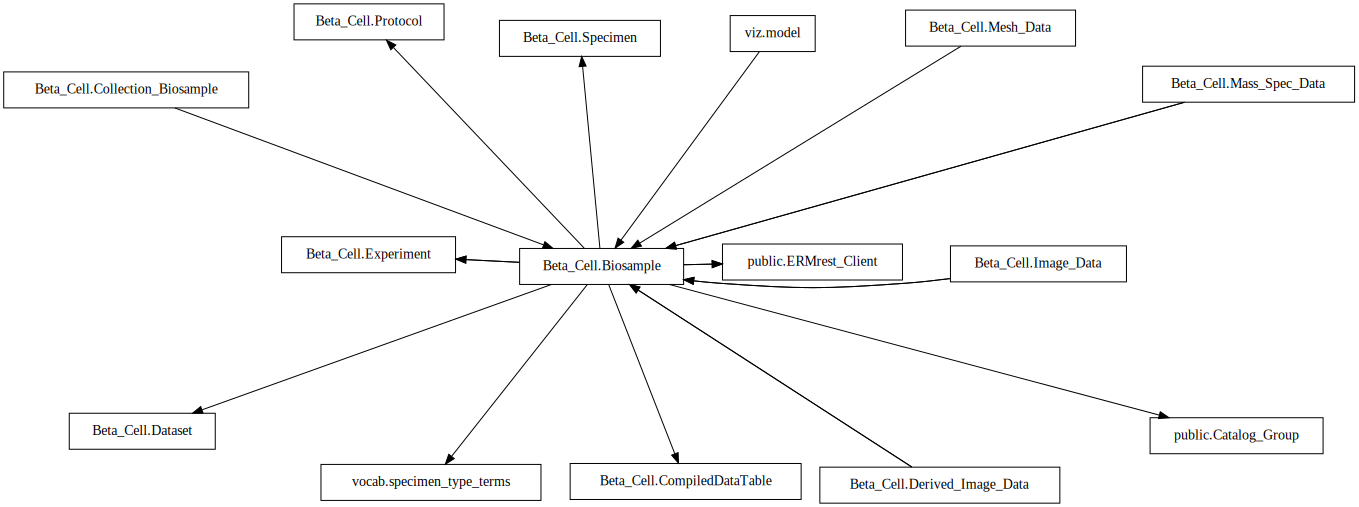

----------------------------------------------------------------------------------------------------------------------------------


In [74]:
ddescribe(bcb)
dgraph(bcb)

### Table "Beta\_Cell:CompiledDataTable"
#### Columns
| Name         | Type        | Nullable | Default | Comment |
|--------------|-------------|----------|---------|---------|
| RID          | ermrest\_rid | False    | None    | None    |
| RCT          | ermrest\_rct | False    | None    | None    |
| RMT          | ermrest\_rmt | False    | None    | None    |
| RCB          | ermrest\_rcb | True     | None    | None    |
| RMB          | ermrest\_rmb | True     | None    | None    |
| DatasetType  | text        | True     | None    | None    |
| ExternalFlag | boolean     | True     | None    | None    |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| CompiledDataTable\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                      | Referenced Columns |
|------------------------------------|---------------------|----------------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | DatasetType         | Beta\_Cell:DatasetTypeVocab | RID                |

#### Referenced By
| Constraint Name                    | Table               | Foreign Key Columns | Referenced Columns |
|------------------------------------|---------------------|---------------------|--------------------|
| Biosample\_CompiledDataTableID\_fkey | Beta\_Cell:Biosample | CompiledDataTableID | RID                |



----------------------------------------------------------------------------------------------------------------------------------


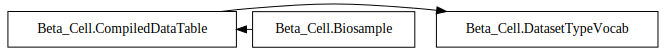

----------------------------------------------------------------------------------------------------------------------------------


In [75]:
ddescribe(cdt)
dgraph(cdt)

In [76]:
getTableData("Beta_Cell", "Biosample")


Number of entries 566 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Sample_Position,Specimen,Specimen_Type,Experiment,Protocol,Container_Id,Owner,Sample_Processing_Protocol,Data_Processing_Protocol,CompiledDataTableID
0,1-8WZA,2018-06-18T15:35:13.3335-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,1.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None,None
1,1-8WZE,2018-06-18T15:35:13.370604-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,2.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None,None
2,1-8WZJ,2018-06-18T15:35:13.397244-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,3.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None,None
3,1-8WZP,2018-06-18T15:35:13.423499-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,4.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None,None
4,1-8WZT,2018-06-18T15:35:13.449074-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,5.0,1-A2VM,OBI:0000922,1-8DP2,None,782.0,https://auth.globus.org/2598a73e-4419-11e9-a3c...,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1-DAV6,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,6.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,None
562,1-DAV8,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,7.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,None
563,1-DAVA,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,8.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,None
564,1-DAVC,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:02:48.19635-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,9.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,None


In [77]:
## We have to assign one CompiledDataTable RID to fkey column of Biosample but for different DatasetTypes separately

In [78]:
bioSampleData = getTableData("Beta_Cell", "Biosample")
l["DataTableFluorescenceImaging"]["biosampleRIDs"] = list(bioSampleData.RID[bioSampleData.Dataset=="1-DCFG"])
l["DataTableSXT"]["biosampleRIDs"] = list(bioSampleData.RID[bioSampleData.Dataset!="1-DCFG"])
CDTData = getTableData("Beta_Cell", "CompiledDataTable")
l["DataTableFluorescenceImaging"]["CDTRIDs"] = list(CDTData.RID[CDTData.DatasetType==l["DataTableFluorescenceImaging"]["rid"]])
l["DataTableSXT"]["CDTRIDs"] = list(CDTData.RID[CDTData.DatasetType==l["DataTableSXT"]["rid"]])


Number of entries 566 


Number of entries 566 



In [79]:
print(l)

{'DataTableSXT': {'rid': '1-JAPJ', 'count': 565, 'biosampleRIDs': ['1-8WZA', '1-8WZE', '1-8WZJ', '1-8WZP', '1-8WZT', '1-8WZY', '1-8X02', '1-8X06', '1-8X0A', '1-8X0E', '1-8X0J', '1-8X0P', '1-8X0T', '1-8X0Y', '1-8X12', '1-8X16', '1-8X1A', '1-8X1E', '1-8X1J', '1-8X1P', '1-8X1T', '1-8X1Y', '1-8X22', '1-8X26', '1-8X2A', '1-8X2E', '1-8X2J', '1-8X2P', '1-8X2T', '1-8X2Y', '1-8X32', '1-8X36', '1-8X3A', '1-8X3E', '1-8X3J', '1-8X3P', '1-8X3T', '1-8X3Y', '1-8X42', '1-8X46', '1-8X4A', '1-8X4E', '1-8X4J', '1-8X4P', '1-8X4T', '1-8X4Y', '1-8X52', '1-8X56', '1-8X5A', '1-8X5E', '1-8X5J', '1-8X5P', '1-8X5T', '1-8X5Y', '1-8X62', '1-8X66', '1-8X6A', '1-8X6E', '1-8X6J', '1-8X6P', '1-8X6T', '1-8X6Y', '1-8X72', '1-8X76', '1-8X7A', '1-8X7E', '1-8X7J', '1-8X7P', '1-8X7T', '1-8X7Y', '1-8X82', '1-8X86', '1-8X8A', '1-8X8E', '1-8X8J', '1-8X8P', '1-8X8T', '1-8X8Y', '1-8X92', '1-8X96', '1-8X9A', '1-8X9E', '1-8X9J', '1-8X9P', '1-8X9T', '1-8X9Y', '1-8XA2', '1-8XA6', '1-8XAA', '1-8XAE', '1-8XAJ', '1-8XAP', '1-8XAT', '1-

In [80]:
updateDataentries = []
for key in l:
    for i,j in zip(l[key]["biosampleRIDs"], l[key]["CDTRIDs"]):
        updateDataentries.append({"RID":i, "CompiledDataTableID":j})
print(updateDataentries[:10])
print(updateDataentries[-10:])

[{'RID': '1-8WZA', 'CompiledDataTableID': '1-JARY'}, {'RID': '1-8WZE', 'CompiledDataTableID': '1-JAS0'}, {'RID': '1-8WZJ', 'CompiledDataTableID': '1-JAS2'}, {'RID': '1-8WZP', 'CompiledDataTableID': '1-JAS4'}, {'RID': '1-8WZT', 'CompiledDataTableID': '1-JAS6'}, {'RID': '1-8WZY', 'CompiledDataTableID': '1-JAS8'}, {'RID': '1-8X02', 'CompiledDataTableID': '1-JASA'}, {'RID': '1-8X06', 'CompiledDataTableID': '1-JASC'}, {'RID': '1-8X0A', 'CompiledDataTableID': '1-JASE'}, {'RID': '1-8X0E', 'CompiledDataTableID': '1-JASG'}]
[{'RID': '1-DATW', 'CompiledDataTableID': '1-JBVP'}, {'RID': '1-DATY', 'CompiledDataTableID': '1-JBVR'}, {'RID': '1-DAV0', 'CompiledDataTableID': '1-JBVT'}, {'RID': '1-DAV2', 'CompiledDataTableID': '1-JBVW'}, {'RID': '1-DAV4', 'CompiledDataTableID': '1-JBVY'}, {'RID': '1-DAV6', 'CompiledDataTableID': '1-JBW0'}, {'RID': '1-DAV8', 'CompiledDataTableID': '1-JBW2'}, {'RID': '1-DAVA', 'CompiledDataTableID': '1-JBW4'}, {'RID': '1-DAVC', 'CompiledDataTableID': '1-JBW6'}, {'RID': '1

#### Fill the column BioSample.CompiledDataTableID with RIDs of CompiledDataTable

In [81]:
## Try update
updateTableData("Beta_Cell", "Biosample", updateDataentries)

In [82]:
getTableData("Beta_Cell", "Biosample")


Number of entries 566 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Sample_Position,Specimen,Specimen_Type,Experiment,Protocol,Container_Id,Owner,Sample_Processing_Protocol,Data_Processing_Protocol,CompiledDataTableID
0,1-8XFJ,2018-06-18T15:35:16.631515-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,7.0,1-DA3T,OBI:0000922,1-DA7E,1-A65W,784.0,None,None,None,1-JB12
1,1-8XFP,2018-06-18T15:35:16.655081-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,1.0,1-DA3W,OBI:0000922,1-DA7E,1-A65W,785.0,None,None,None,1-JB14
2,1-8XFT,2018-06-18T15:35:16.678801-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,2.0,1-DA3W,OBI:0000922,1-DA7E,1-A65W,785.0,None,None,None,1-JB16
3,1-B1DG,2019-01-24T18:03:42.720271-08:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/667cfbee-3f18-4117-968...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,None,17.0,1-B18P,OBI:0000922,1-DA7M,1-B16P,931.0,None,None,None,1-JB48
4,1-B1DP,2019-01-24T18:13:02.107542-08:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/667cfbee-3f18-4117-968...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,None,2.0,1-B192,OBI:0000922,1-DA7M,1-A65T,927.0,None,None,None,1-JB4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1-DAV6,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,6.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,1-JBW0
562,1-DAV8,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,7.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,1-JBW2
563,1-DAVA,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,8.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,1-JBW4
564,1-DAVC,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:50.42607-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,9.0,1-DA8G,OBI:0000922,1-DA7G,1-A664,816.0,None,None,None,1-JBW6


### Separate out Biosample into two deparate tables now: DataTableSXT and DataTableFluorescenceImaging

In [83]:
#dtSXT.drop()
dtSXT = bc.create_table_as(
    "DataTableSXT",
    bcb.where((bcb.columns['Dataset'] == '1-882P') | (bcb.columns['Dataset'] == '1-CN76')).select()
)
describe_graph(dtSXT)
getTableData("Beta_Cell", "DataTableSXT")

### Table "Beta\_Cell:DataTableSXT"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name              | Unique Columns |
|------------------------------|----------------|
| DataTableSXT\_Dataset\_RID\_key | Dataset, RID   |
| DataTableSXT\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                       | Foreign Key Columns | Table                         | Referenced Columns |
|---------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableSXT\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableSXT\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableSXT\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableSXT\_Experiment\_Dataset\_fkey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableSXT\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableSXT\_Dataset\_fkey           | Dataset             | Beta\_Cell:Dataset            | RID                |
| DataTableSXT\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableSXT\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:CompiledDataTable  | RID                |



----------------------------------------------------------------------------------------------------------------------------------

Number of entries 565 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Sample_Position,Specimen,Specimen_Type,Experiment,Protocol,Container_Id,Owner,Sample_Processing_Protocol,Data_Processing_Protocol,CompiledDataTableID
0,1-8XFJ,2018-06-18T15:35:16.631515-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,7,1-DA3T,OBI:0000922,1-DA7E,1-A65W,784,None,None,None,1-JB12
1,1-8XFP,2018-06-18T15:35:16.655081-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,1,1-DA3W,OBI:0000922,1-DA7E,1-A65W,785,None,None,None,1-JB14
2,1-8XFT,2018-06-18T15:35:16.678801-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-04-01,2,1-DA3W,OBI:0000922,1-DA7E,1-A65W,785,None,None,None,1-JB16
3,1-B1DG,2019-01-24T18:03:42.720271-08:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/667cfbee-3f18-4117-968...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,None,17,1-B18P,OBI:0000922,1-DA7M,1-B16P,931,None,None,None,1-JB48
4,1-B1DP,2019-01-24T18:13:02.107542-08:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/667cfbee-3f18-4117-968...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,None,2,1-B192,OBI:0000922,1-DA7M,1-A65T,927,None,None,None,1-JB4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,1-DAV4,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,5,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBVY
561,1-DAV6,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,6,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBW0
562,1-DAV8,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,7,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBW2
563,1-DAVA,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,8,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBW4


In [84]:
#dtFI.drop()
dtFI = bc.create_table_as(
    "DataTableFluorescenceImaging",
    bcb.where(bcb.columns['Dataset'] == "1-DCFG").select()
)
describe_graph(dtFI)
getTableData("Beta_Cell", "DataTableFluorescenceImaging")

### Table "Beta\_Cell:DataTableFluorescenceImaging"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name                              | Unique Columns |
|----------------------------------------------|----------------|
| DataTableFluorescenceImaging\_Dataset\_RID\_key | Dataset, RID   |
| DataTableFluorescenceImaging\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                                       | Foreign Key Columns | Table                         | Referenced Columns |
|-------------------------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableFluorescenceImaging\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableFluorescenceImaging\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableFluorescenceImaging\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableFluorescenceImaging\_Experiment\_Dataset\_fkey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableFluorescenceImaging\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableFluorescenceImaging\_Dataset\_fkey           | Dataset             | Beta\_Cell:Dataset            | RID                |
| DataTableFluorescenceImaging\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableFluorescenceImaging\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:CompiledDataTable  | RID                |



----------------------------------------------------------------------------------------------------------------------------------

Number of entries 1 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Sample_Position,Specimen,Specimen_Type,Experiment,Protocol,Container_Id,Owner,Sample_Processing_Protocol,Data_Processing_Protocol,CompiledDataTableID
0,1-DCFJ,2020-06-04T16:03:05.022475-07:00,2022-03-10T12:10:11.10191-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCFG,None,None,None,1-DCFE,None,None,None,None,None,None,None,1-JBW8


### Change the foreign keys that refer to Biosample to now refer to two newly created datatables

In [85]:
ddescribe(bcb)

### Table "Beta\_Cell:Biosample"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| Biosample\_Dataset\_RID\_Key | Dataset, RID   |
| Biosample\_Key            | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                         | Referenced Columns |
|------------------------------------|---------------------|-------------------------------|--------------------|
| Biosample\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Specimen\_Type\_FKey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| Biosample\_Protocol\_FKey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| Biosample\_Specimen\_FKey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| Biosample\_Experiment\_Dataset\_FKey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| Biosample\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| Biosample\_Experiment\_FKey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| Biosample\_Dataset\_FKey           | Dataset             | Beta\_Cell:Dataset            | RID                |
| Biosample\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| Biosample\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:CompiledDataTable  | RID                |

#### Referenced By
| Constraint Name                           | Table                          | Foreign Key Columns | Referenced Columns |
|-------------------------------------------|--------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_Biosample\_fkey | Beta\_Cell:Derived\_Image\_Data | Biosample, Dataset  | RID, Dataset       |
| Derived\_Image\_Data\_Biosample\_fkey     | Beta\_Cell:Derived\_Image\_Data | Biosample           | RID                |
| Image\_Data\_Dataset\_Biosample\_fkey     | Beta\_Cell:Image\_Data         | Dataset, Biosample  | Dataset, RID       |
| Image\_Data\_Biosample\_fkey              | Beta\_Cell:Image\_Data         | Biosample           | RID                |
| Collection\_Biosample\_Biosample\_fkey    | Beta\_Cell:Collection\_Biosample | Biosample           | RID                |
| Mass\_Spec\_Data\_Biosample\_FKey         | Beta\_Cell:Mass\_Spec\_Data    | Biosample           | RID                |
| Mass\_Spec\_Dataset\_RID\_FKey            | Beta\_Cell:Mass\_Spec\_Data    | Biosample, Dataset  | RID, Dataset       |
| Mesh\_Data\_biosample\_fkey               | Beta\_Cell:Mesh\_Data          | biosample           | RID                |
| model\_biosample\_fkey                    | Beta\_Cell:model               | biosample           | RID                |



----------------------------------------------------------------------------------------------------------------------------------


## Refered by tables that need to be changed:
## 1. Image_Data: This need to be renamed to "Files" and then DataTables will refer to Files instead of Files referring to DataTables

### Changing Image_Data to name "Files" and change direction of reference

In [86]:
bcid = bc.tables["Image_Data"]
ddescribe(bcid)

### Table "Beta\_Cell:Image\_Data"
#### Columns
| Name            | Type        | Nullable | Default                                                       | Comment                                                      |
|-----------------|-------------|----------|---------------------------------------------------------------|--------------------------------------------------------------|
| RID             | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                         |
| RCT             | ermrest\_rct | False    | now\(\)                                                       | None                                                         |
| RMT             | ermrest\_rmt | False    | now\(\)                                                       | None                                                         |
| RCB             | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                         |
| RMB             | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                         |
| Dataset         | text        | False    | None                                                          | None                                                         |
| Description     | markdown    | True     | None                                                          | None                                                         |
| File\_Type      | text        | True     | None                                                          | None                                                         |
| Submitted\_On   | timestamptz | True     | None                                                          | None                                                         |
| File\_Id        | int4        | True     | None                                                          | None                                                         |
| Biosample       | ermrest\_rid | True     | None                                                          | Biosample from which this X Ray Tomography data was obtained |
| MD5             | text        | False    | None                                                          | None                                                         |
| Length          | int8        | False    | None                                                          | None                                                         |
| URL             | text        | False    | None                                                          | None                                                         |
| Filename        | text        | False    | None                                                          | None                                                         |
| Owner           | text        | True     | None                                                          | None                                                         |
| Experiment\_Type | text        | True     | None                                                          | None                                                         |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Image\_Data\_RID\_key      | RID            |
| Image\_Data\_RID\_Dataset\_key | RID, Dataset   |

#### Foreign Keys
| Constraint Name                   | Foreign Key Columns | Table                          | Referenced Columns |
|-----------------------------------|---------------------|--------------------------------|--------------------|
| Image\_Data\_RCB\_fkey            | RCB                 | Beta\_Cell:ERMrest\_Client     | ID                 |
| Image\_Data\_Dataset\_Biosample\_fkey | Dataset, Biosample  | Beta\_Cell:Biosample           | Dataset, RID       |
| Image\_Data\_Dataset\_fkey        | Dataset             | Beta\_Cell:Dataset             | RID                |
| Image\_Data\_Owner\_fkey          | Owner               | Beta\_Cell:ERMrest\_Client     | ID                 |
| Image\_Data\_Experiment\_Type\_fkey | Experiment\_Type    | Beta\_Cell:Experiment\_Type\_Term | ID                 |
| Image\_Data\_File\_Type\_fkey     | File\_Type          | Beta\_Cell:File\_Type\_Term    | ID                 |
| Image\_Data\_Biosample\_fkey      | Biosample           | Beta\_Cell:Biosample           | RID                |

#### Referenced By
| Constraint Name                    | Table                        | Foreign Key Columns | Referenced Columns |
|------------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Image\_Data\_fkey | Beta\_Cell:Derived\_Image\_Data | Image\_Data         | RID                |
| Mesh\_Data\_derived\_from\_fkey    | Beta\_Cell:Mesh\_Data        | derived\_from       | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [87]:
# Check that all the entries in Image_Data table belongs to SXT and FI only
tmp = getTableData("Beta_Cell", "Image_Data")
print(set(tmp["Dataset"]))


Number of entries 610 

{'1-CN76', '1-DCFG', '1-882P'}


In [88]:
# Change existing table File to FileOld
bcf = bc.tables["File"]
bcf.alter(table_name="FileOld")

In [89]:
# remane Image_Data to Files
bcid = bc.tables["Image_Data"]
bcid.alter(table_name="Files")

In [90]:
bcf = bc.tables["Files"]
ddescribe(bcf)

### Table "Beta\_Cell:Files"
#### Columns
| Name            | Type        | Nullable | Default                                                       | Comment                                                      |
|-----------------|-------------|----------|---------------------------------------------------------------|--------------------------------------------------------------|
| RID             | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                         |
| RCT             | ermrest\_rct | False    | now\(\)                                                       | None                                                         |
| RMT             | ermrest\_rmt | False    | now\(\)                                                       | None                                                         |
| RCB             | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                         |
| RMB             | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                         |
| Dataset         | text        | False    | None                                                          | None                                                         |
| Description     | markdown    | True     | None                                                          | None                                                         |
| File\_Type      | text        | True     | None                                                          | None                                                         |
| Submitted\_On   | timestamptz | True     | None                                                          | None                                                         |
| File\_Id        | int4        | True     | None                                                          | None                                                         |
| Biosample       | ermrest\_rid | True     | None                                                          | Biosample from which this X Ray Tomography data was obtained |
| MD5             | text        | False    | None                                                          | None                                                         |
| Length          | int8        | False    | None                                                          | None                                                         |
| URL             | text        | False    | None                                                          | None                                                         |
| Filename        | text        | False    | None                                                          | None                                                         |
| Owner           | text        | True     | None                                                          | None                                                         |
| Experiment\_Type | text        | True     | None                                                          | None                                                         |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Image\_Data\_RID\_key      | RID            |
| Image\_Data\_RID\_Dataset\_key | RID, Dataset   |

#### Foreign Keys
| Constraint Name                   | Foreign Key Columns | Table                          | Referenced Columns |
|-----------------------------------|---------------------|--------------------------------|--------------------|
| Image\_Data\_RCB\_fkey            | RCB                 | Beta\_Cell:ERMrest\_Client     | ID                 |
| Image\_Data\_Dataset\_Biosample\_fkey | Dataset, Biosample  | Beta\_Cell:Biosample           | Dataset, RID       |
| Image\_Data\_Dataset\_fkey        | Dataset             | Beta\_Cell:Dataset             | RID                |
| Image\_Data\_Owner\_fkey          | Owner               | Beta\_Cell:ERMrest\_Client     | ID                 |
| Image\_Data\_Experiment\_Type\_fkey | Experiment\_Type    | Beta\_Cell:Experiment\_Type\_Term | ID                 |
| Image\_Data\_File\_Type\_fkey     | File\_Type          | Beta\_Cell:File\_Type\_Term    | ID                 |
| Image\_Data\_Biosample\_fkey      | Biosample           | Beta\_Cell:Biosample           | RID                |

#### Referenced By
| Constraint Name                    | Table                        | Foreign Key Columns | Referenced Columns |
|------------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Image\_Data\_fkey | Beta\_Cell:Derived\_Image\_Data | Image\_Data         | RID                |
| Mesh\_Data\_derived\_from\_fkey    | Beta\_Cell:Mesh\_Data        | derived\_from       | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [91]:
filesData = getTableData("Beta_Cell", "Files")


Number of entries 610 



In [92]:
## Point DataTables to Files instead of Files pointing to DataTables

In [93]:
filesRIDBiosampleRID = []
for i, j in zip(filesData.RID, filesData.Biosample):
    filesRIDBiosampleRID.append((i, j))
filesRIDBiosampleRID[:10]

[('1-CQ4G', '1-B174'),
 ('1-CQ4J', '1-B18E'),
 ('1-CQ4M', '1-B194'),
 ('1-CQ4P', '1-B1A8'),
 ('1-CQ4R', '1-B1CG'),
 ('1-CQ4T', '1-B1DP'),
 ('1-CQ4W', '1-B1FA'),
 ('1-CQ4Y', '1-B1GG'),
 ('1-CQ50', '1-B1E2'),
 ('1-CQ52', '1-B1XT')]

In [94]:
import collections
tmp = dict(collections.Counter(filesData.Biosample))
tmpRIDs = [] ## Biosample IDs that are referred more than once.
for key in tmp:
    if tmp[key]>1:
        tmpRIDs.append(key)
filesRIDsDelete = []
for rid in tmpRIDs:
    t1 = N.where(N.asarray(filesData.Biosample)==rid)[0]
    filesRIDsDelete.extend([filesRIDBiosampleRID[i][0] for i in t1[1:]])
filesRIDsDelete

['1-DBW2',
 '1-DBTM',
 '1-DBW6',
 '1-DC5R',
 '1-DC5P',
 '1-DCE2',
 '1-DBW4',
 '1-DBW8',
 '1-DBWA',
 '1-DBWC',
 '1-DBWE',
 '1-DBWG',
 '1-DBWJ',
 '1-DBWM',
 '1-DBTR',
 '1-DBTT',
 '1-DBTW',
 '1-DBTY',
 '1-DBV0',
 '1-DBV2',
 '1-DBV4',
 '1-DC4Y',
 '1-DBWR',
 '1-DBWT',
 '1-DBWW',
 '1-DC50',
 '1-DBWY',
 '1-DBX0',
 '1-DBX2',
 '1-DBX4',
 '1-DBX6',
 '1-DBWP',
 '1-DBX8',
 '1-DBXA',
 '1-DBXC',
 '1-DBXE',
 '1-DBXG',
 '1-DC52',
 '1-DC3A',
 '1-DC3C',
 '1-DCE4',
 '1-DCE6',
 '1-DCE8',
 '1-DCEA',
 '1-DCEC',
 '1-DCEE',
 '1-DCEG',
 '1-DCEJ',
 '1-DCE0',
 '1-DCEM',
 '1-DCEP',
 '1-DCER',
 '1-DCF0',
 '1-DCF2',
 '1-DCF4',
 '1-DC58',
 '1-DCD6',
 '1-DCD8',
 '1-DCDA',
 '1-DCET',
 '1-DCEW',
 '1-DCEY',
 '1-DCDC',
 '1-DCDE',
 '1-DCDG',
 '1-DCDJ',
 '1-DCDM',
 '1-DCDP',
 '1-DCDR',
 '1-DCDT',
 '1-DC5A',
 '1-DC1T',
 '1-DC1W',
 '1-DC1Y',
 '1-DC20',
 '1-DC22',
 '1-DBSP',
 '1-DCB4']

In [95]:
### Delete rows from Table Files that are referring to Biosample more than once. Basically only keeping first image_data for each Biosample entry
print(len(list(filesData.RID)))
datapath = catalog.getPathBuilder()
table_ = datapath.schemas["Beta_Cell"].tables["Files"]
for rid in filesRIDsDelete:
    path = table_.filter(table_.RID == rid)
    tmpLen = len(list(path.entities()))
    if tmpLen!=0:
        path.delete()
print(len(list(getTableData("Beta_Cell", "Files").RID)))

610

Number of entries 532 

532


In [96]:
filesData = getTableData("Beta_Cell", "Files")


Number of entries 532 



In [97]:
filesRIDBiosampleRID = []
for i, j in zip(filesData.RID, filesData.Biosample):
    filesRIDBiosampleRID.append((i, j))
print(len(filesRIDBiosampleRID))
filesRIDBiosampleRID[:10]

532


[('1-CQ4G', '1-B174'),
 ('1-CQ4J', '1-B18E'),
 ('1-CQ4M', '1-B194'),
 ('1-CQ4P', '1-B1A8'),
 ('1-CQ4R', '1-B1CG'),
 ('1-CQ4T', '1-B1DP'),
 ('1-CQ4W', '1-B1FA'),
 ('1-CQ4Y', '1-B1GG'),
 ('1-CQ50', '1-B1E2'),
 ('1-CQ52', '1-B1XT')]

In [98]:
for i, fkey in enumerate(bcf.foreign_keys):
    print(i, fkey.constraint_name)

0 Image_Data_RCB_fkey
1 Image_Data_Dataset_Biosample_fkey
2 Image_Data_Dataset_fkey
3 Image_Data_Owner_fkey
4 Image_Data_Experiment_Type_fkey
5 Image_Data_File_Type_fkey
6 Image_Data_Biosample_fkey


In [99]:
# Drop all unncessary fkeys
fkey = bcf.foreign_keys[1]
fkey.drop()
for i, fkey in enumerate(bcf.foreign_keys):
    print(i, fkey.constraint_name)

0 Image_Data_RCB_fkey
1 Image_Data_Dataset_fkey
2 Image_Data_Owner_fkey
3 Image_Data_Experiment_Type_fkey
4 Image_Data_File_Type_fkey
5 Image_Data_Biosample_fkey


In [100]:
fkey = bcf.foreign_keys[1]
fkey.drop()
for i, fkey in enumerate(bcf.foreign_keys):
    print(i, fkey.constraint_name)

0 Image_Data_RCB_fkey
1 Image_Data_Owner_fkey
2 Image_Data_Experiment_Type_fkey
3 Image_Data_File_Type_fkey
4 Image_Data_Biosample_fkey


In [101]:
fkey = bcf.foreign_keys[4]
fkey.drop()
for i, fkey in enumerate(bcf.foreign_keys):
    print(i, fkey.constraint_name)

0 Image_Data_RCB_fkey
1 Image_Data_Owner_fkey
2 Image_Data_Experiment_Type_fkey
3 Image_Data_File_Type_fkey


In [102]:
fkey = bcf.foreign_keys[2]
fkey.drop()
for i, fkey in enumerate(bcf.foreign_keys):
    print(i, fkey.constraint_name)

0 Image_Data_RCB_fkey
1 Image_Data_Owner_fkey
2 Image_Data_File_Type_fkey


In [103]:
for i, key in enumerate(bcf.keys):
    print(i, key.constraint_name)

0 Image_Data_RID_key
1 Image_Data_RID_Dataset_key


In [104]:
# Drop all unncessary keys
key = bcf.keys[1]
key.drop()

In [105]:
for i, key in enumerate(bcf.column_definitions):
    print(i, key.name)

0 RID
1 RCT
2 RMT
3 RCB
4 RMB
5 Dataset
6 Description
7 File_Type
8 Submitted_On
9 File_Id
10 Biosample
11 MD5
12 Length
13 URL
14 Filename
15 Owner
16 Experiment_Type


In [106]:
bcf.columns[16].drop()
for i, key in enumerate(bcf.column_definitions):
    print(i, key.name)

0 RID
1 RCT
2 RMT
3 RCB
4 RMB
5 Dataset
6 Description
7 File_Type
8 Submitted_On
9 File_Id
10 Biosample
11 MD5
12 Length
13 URL
14 Filename
15 Owner


In [107]:
bcf.columns[5].drop()
for i, key in enumerate(bcf.column_definitions):
    print(i, key.name)

0 RID
1 RCT
2 RMT
3 RCB
4 RMB
5 Description
6 File_Type
7 Submitted_On
8 File_Id
9 Biosample
10 MD5
11 Length
12 URL
13 Filename
14 Owner


In [108]:
bcf.columns[9].drop()
for i, key in enumerate(bcf.column_definitions):
    print(i, key.name)

0 RID
1 RCT
2 RMT
3 RCB
4 RMB
5 Description
6 File_Type
7 Submitted_On
8 File_Id
9 MD5
10 Length
11 URL
12 Filename
13 Owner


In [109]:
getTableData("Beta_Cell", "Files")


Number of entries 532 



,RID,RCT,RMT,RCB,RMB,Description,File_Type,Submitted_On,File_Id,MD5,Length,URL,Filename,Owner
0,1-CQ4G,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,d7b3688a703a0841c4a887c7a7c7670d,473460604,/hatrac/commons/data/1-882P/1-B174/Stevens_pan...,Stevens_pancreatic_INS_1E_25-10_30min_822_7_pr...,None
1,1-CQ4J,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,8568061a290733ba7adbacf94aee3661,474417088,/hatrac/commons/data/1-882P/1-B18E/Stevens_pan...,Stevens_pancreatic_INS_1E_3_842_12_pre_rec.mrc,None
2,1-CQ4M,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,92f2ef5ba3ea314d3b1b485ebc9e2404,446867980,/hatrac/commons/data/1-882P/1-B194/Stevens_pan...,Stevens_pancreatic_INS_1E_25-10_30min_822_1_pr...,None
3,1-CQ4P,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,c3f9bb45626e418af9fd7d8e7d739f8d,470544320,/hatrac/commons/data/1-882P/1-B1A8/Stevens_pan...,Stevens_pancreatic_INS_1E_3_842_3_pre_rec.mrc,None
4,1-CQ4R,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,af1d74269323de4bc46e450823a28232,454294204,/hatrac/commons/data/1-882P/1-B1CG/Stevens_pan...,Stevens_pancreatic_INS_25Glu_10Ex30_931_6_pre_...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1-DCD2,2020-05-28T19:14:06.915079-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,8aa0b1930aaab3d3e245e14737611bb7,343605688,/hatrac/commons/data/1-882P/1-DA9Y/Stevens_PBC...,Stevens_PBC_INS1e_25mMglu+Ex-4_5min_1096_2_pre...,None
528,1-DCD4,2020-05-28T19:22:27.280304-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,482e7fdad1ad2368e47ac934aac0c6bd,433922020,/hatrac/commons/data/1-882P/1-DAA0/Stevens_PBC...,Stevens_PBC_INS1e_25mMglu+Ex-4_5min_1096_3_pre...,None
529,1-DCDW,2020-05-28T22:32:48.591765-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,4fa059274d3f0956c75c4acebc9935ab,356304400,/hatrac/commons/data/1-882P/1-DATG/Stevens_pan...,Stevens_pancreatic_INS_1E_5_817_6_pre_rec.mrc,None
530,1-DCDY,2020-05-28T22:44:53.100825-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,0e52efabfb02ca83b252ae822019afe1,477341404,/hatrac/commons/data/1-882P/1-DATM/Stevens_pan...,Stevens_pancreatic_INS_1E_5_817_8_pre_rec.mrc,None


In [110]:
ddescribe(bcf)

### Table "Beta\_Cell:Files"
#### Columns
| Name         | Type        | Nullable | Default                                                       | Comment |
|--------------|-------------|----------|---------------------------------------------------------------|---------|
| RID          | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT          | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT          | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB          | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB          | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Description  | markdown    | True     | None                                                          | None    |
| File\_Type   | text        | True     | None                                                          | None    |
| Submitted\_On | timestamptz | True     | None                                                          | None    |
| File\_Id     | int4        | True     | None                                                          | None    |
| MD5          | text        | False    | None                                                          | None    |
| Length       | int8        | False    | None                                                          | None    |
| URL          | text        | False    | None                                                          | None    |
| Filename     | text        | False    | None                                                          | None    |
| Owner        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name    | Unique Columns |
|--------------------|----------------|
| Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name           | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------|---------------------|--------------------------|--------------------|
| Image\_Data\_RCB\_fkey    | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_Owner\_fkey  | Owner               | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_File\_Type\_fkey | File\_Type          | Beta\_Cell:File\_Type\_Term | ID                 |

#### Referenced By
| Constraint Name                    | Table                        | Foreign Key Columns | Referenced Columns |
|------------------------------------|------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Image\_Data\_fkey | Beta\_Cell:Derived\_Image\_Data | Image\_Data         | RID                |
| Mesh\_Data\_derived\_from\_fkey    | Beta\_Cell:Mesh\_Data        | derived\_from       | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [111]:
## Now create File Fkey Column in DataTableSXT, DataTableFI
dtSXT.create_column(Column.define(
    "File",
    builtin_types.text
))
dtSXT.create_fkey(ForeignKey.define(
    fk_colnames=["File"],
    pk_sname="Beta_Cell",
    pk_tname="Files",
    pk_colnames=["RID"]
))
ddescribe(dtSXT)

### Table "Beta\_Cell:DataTableSXT"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |
| File                       | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name              | Unique Columns |
|------------------------------|----------------|
| DataTableSXT\_Dataset\_RID\_key | Dataset, RID   |
| DataTableSXT\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                       | Foreign Key Columns | Table                         | Referenced Columns |
|---------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableSXT\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableSXT\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableSXT\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableSXT\_Experiment\_Dataset\_fkey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableSXT\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableSXT\_Dataset\_fkey           | Dataset             | Beta\_Cell:Dataset            | RID                |
| DataTableSXT\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableSXT\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:CompiledDataTable  | RID                |
| DataTableSXT\_File\_fkey              | File                | Beta\_Cell:Files              | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [112]:
dtFI.create_column(Column.define(
    "File",
    builtin_types.text
))
dtFI.create_fkey(ForeignKey.define(
    fk_colnames=["File"],
    pk_sname="Beta_Cell",
    pk_tname="Files",
    pk_colnames=["RID"]
))
ddescribe(dtFI)

### Table "Beta\_Cell:DataTableFluorescenceImaging"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |
| File                       | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name                              | Unique Columns |
|----------------------------------------------|----------------|
| DataTableFluorescenceImaging\_Dataset\_RID\_key | Dataset, RID   |
| DataTableFluorescenceImaging\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                                       | Foreign Key Columns | Table                         | Referenced Columns |
|-------------------------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableFluorescenceImaging\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableFluorescenceImaging\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableFluorescenceImaging\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableFluorescenceImaging\_Experiment\_Dataset\_fkey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableFluorescenceImaging\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableFluorescenceImaging\_Dataset\_fkey           | Dataset             | Beta\_Cell:Dataset            | RID                |
| DataTableFluorescenceImaging\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableFluorescenceImaging\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:CompiledDataTable  | RID                |
| DataTableFluorescenceImaging\_File\_fkey              | File                | Beta\_Cell:Files              | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [113]:
## remove unnecessary columns from dtFI

In [114]:
for i, key in enumerate(dtFI.column_definitions):
    print(i, key.name)

0 RID
1 RCT
2 RMT
3 RCB
4 RMB
5 Dataset
6 Summary
7 Collection_Date
8 Sample_Position
9 Specimen
10 Specimen_Type
11 Experiment
12 Protocol
13 Container_Id
14 Owner
15 Sample_Processing_Protocol
16 Data_Processing_Protocol
17 CompiledDataTableID
18 File


In [115]:
dtFI.columns["Sample_Position"].drop()
dtFI.columns["Container_Id"].drop()
for i, key in enumerate(dtFI.column_definitions):
    print(i, key.name)

0 RID
1 RCT
2 RMT
3 RCB
4 RMB
5 Dataset
6 Summary
7 Collection_Date
8 Specimen
9 Specimen_Type
10 Experiment
11 Protocol
12 Owner
13 Sample_Processing_Protocol
14 Data_Processing_Protocol
15 CompiledDataTableID
16 File


In [116]:
## Now add data to this column
dataSXT = getTableData("Beta_Cell", "DataTableSXT")
dataFI = getTableData("Beta_Cell", "DataTableFluorescenceImaging")


Number of entries 565 


Number of entries 1 



In [117]:
filesRIDBiosampleRID[-1]

('1-DCFM', '1-DCFJ')

In [118]:
new_entries = []
for i in filesRIDBiosampleRID[:-1]:
    new_entries.append({"RID":i[1], "File":i[0]})
new_entries[:15]

[{'RID': '1-B174', 'File': '1-CQ4G'},
 {'RID': '1-B18E', 'File': '1-CQ4J'},
 {'RID': '1-B194', 'File': '1-CQ4M'},
 {'RID': '1-B1A8', 'File': '1-CQ4P'},
 {'RID': '1-B1CG', 'File': '1-CQ4R'},
 {'RID': '1-B1DP', 'File': '1-CQ4T'},
 {'RID': '1-B1FA', 'File': '1-CQ4W'},
 {'RID': '1-B1GG', 'File': '1-CQ4Y'},
 {'RID': '1-B1E2', 'File': '1-CQ50'},
 {'RID': '1-B1XT', 'File': '1-CQ52'},
 {'RID': '1-B1YM', 'File': '1-CQ54'},
 {'RID': '1-CN7A', 'File': '1-CQ56'},
 {'RID': '1-CN8E', 'File': '1-CQ58'},
 {'RID': '1-CN9P', 'File': '1-CQ5A'},
 {'RID': '1-CNB8', 'File': '1-CQ5C'}]

In [119]:
updateTableData("Beta_Cell", "DataTableSXT", new_entries)
getTableData("Beta_Cell", "DataTableSXT")


Number of entries 565 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Sample_Position,Specimen,Specimen_Type,Experiment,Protocol,Container_Id,Owner,Sample_Processing_Protocol,Data_Processing_Protocol,CompiledDataTableID,File
0,1-A4XC,2018-09-20T21:16:35.387759-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/667cfbee-3f18-4117-968...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-06-15,7,1-A4X8,OBI:0000922,1-8DPP,None,787,None,None,None,1-JB1J,None
1,1-D70W,2019-07-23T02:33:50.104932-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-CN76,None,2019-06-01,4,None,OBI:0000922,1-CN78,None,1060,None,None,None,1-JB8R,None
2,1-D710,2019-07-23T02:44:22.265335-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-CN76,None,2019-06-01,8,None,OBI:0000922,1-CN78,None,1044,None,None,None,1-JB8T,None
3,1-D714,2019-07-23T02:51:41.581114-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-CN76,None,2019-06-01,16,None,OBI:0000922,1-CN8R,None,1083,None,None,None,1-JB8W,None
4,1-D716,2019-07-23T02:56:57.521864-07:00,2022-03-10T12:09:59.56024-08:00,https://auth.globus.org/7f13ea9a-c9ac-4eb3-a85...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-CN76,None,2019-06-01,9,None,OBI:0000922,1-CN8R,None,1096,None,None,None,1-JB8Y,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,1-DAV4,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:13:17.611721-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,5,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBVY,1-DBT0
561,1-DAV6,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:13:17.611721-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,6,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBW0,1-DBT2
562,1-DAV8,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:13:17.611721-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,7,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBW2,1-DBT4
563,1-DAVA,2020-05-19T18:25:50.782279-07:00,2022-03-10T12:13:17.611721-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,2018-05-01,8,1-DA8G,OBI:0000922,1-DA7G,1-A664,816,None,None,None,1-JBW4,1-DBT6


In [120]:
new_entries = []
for i in [filesRIDBiosampleRID[-1]]:
    new_entries.append({"RID":i[1], "File":i[0]})
new_entries

[{'RID': '1-DCFJ', 'File': '1-DCFM'}]

In [121]:
updateTableData("Beta_Cell", "DataTableFluorescenceImaging", new_entries)
getTableData("Beta_Cell", "DataTableFluorescenceImaging")


Number of entries 1 



,RID,RCT,RMT,RCB,RMB,Dataset,Summary,Collection_Date,Specimen,Specimen_Type,Experiment,Protocol,Owner,Sample_Processing_Protocol,Data_Processing_Protocol,CompiledDataTableID,File
0,1-DCFJ,2020-06-04T16:03:05.022475-07:00,2022-03-10T12:13:28.169813-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DCFG,None,None,1-DCFE,None,None,None,None,None,None,1-JBW8,1-DCFM


In [122]:
getTableData("Beta_Cell", "Mass_Spec_Data")


Number of entries 0 



""


In [123]:
bcmsd = bc.tables["Mass_Spec_Data"]
bcmsd.drop(cascade=True)

In [124]:
ddescribe(bcf)

### Table "Beta\_Cell:Files"
#### Columns
| Name         | Type        | Nullable | Default                                                       | Comment |
|--------------|-------------|----------|---------------------------------------------------------------|---------|
| RID          | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT          | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT          | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB          | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB          | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Description  | markdown    | True     | None                                                          | None    |
| File\_Type   | text        | True     | None                                                          | None    |
| Submitted\_On | timestamptz | True     | None                                                          | None    |
| File\_Id     | int4        | True     | None                                                          | None    |
| MD5          | text        | False    | None                                                          | None    |
| Length       | int8        | False    | None                                                          | None    |
| URL          | text        | False    | None                                                          | None    |
| Filename     | text        | False    | None                                                          | None    |
| Owner        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name    | Unique Columns |
|--------------------|----------------|
| Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name           | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------|---------------------|--------------------------|--------------------|
| Image\_Data\_RCB\_fkey    | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_Owner\_fkey  | Owner               | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_File\_Type\_fkey | File\_Type          | Beta\_Cell:File\_Type\_Term | ID                 |

#### Referenced By
| Constraint Name                        | Table                                  | Foreign Key Columns | Referenced Columns |
|----------------------------------------|----------------------------------------|---------------------|--------------------|
| Derived\_Image\_Data\_Image\_Data\_fkey | Beta\_Cell:Derived\_Image\_Data        | Image\_Data         | RID                |
| Mesh\_Data\_derived\_from\_fkey        | Beta\_Cell:Mesh\_Data                  | derived\_from       | RID                |
| DataTableSXT\_File\_fkey               | Beta\_Cell:DataTableSXT                | File                | RID                |
| DataTableFluorescenceImaging\_File\_fkey | Beta\_Cell:DataTableFluorescenceImaging | File                | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [125]:
bcdid = bc.tables["Derived_Image_Data"]
ddescribe(bcdid)

### Table "Beta\_Cell:Derived\_Image\_Data"
#### Columns
| Name       | Type        | Nullable | Default                                                       | Comment |
|------------|-------------|----------|---------------------------------------------------------------|---------|
| RID        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT        | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT        | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Dataset    | text        | False    | None                                                          | None    |
| Process    | text        | True     | None                                                          | None    |
| Biosample  | text        | True     | None                                                          | None    |
| Owner      | text        | True     | None                                                          | None    |
| File\_Type | text        | True     | None                                                          | None    |
| Image\_Data | ermrest\_rid | True     | None                                                          | None    |
| URL        | text        | True     | None                                                          | None    |
| Length     | int8        | True     | None                                                          | None    |
| Filename   | text        | True     | None                                                          | None    |
| MD5        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name                         | Unique Columns    |
|-----------------------------------------|-------------------|
| Derived\_Image\_Data\_Dataset\_Filename\_key | Filename, Dataset |
| Derived\_Image\_Data\_RID\_key          | RID               |

#### Foreign Keys
| Constraint Name                           | Foreign Key Columns | Table                    | Referenced Columns |
|-------------------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_Dataset\_fkey       | Dataset             | Beta\_Cell:Dataset       | RID                |
| Derived\_Image\_Data\_RMB\_fkey           | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Dataset\_Biosample\_fkey | Biosample, Dataset  | Beta\_Cell:Biosample     | RID, Dataset       |
| Derived\_Image\_Data\_Process\_fkey       | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_Image\_Data\_fkey   | Image\_Data         | Beta\_Cell:Files         | RID                |
| Derived\_Image\_Data\_Owner\_fkey         | Owner               | Beta\_Cell:Catalog\_Group | ID                 |
| Derived\_Image\_Data\_Biosample\_fkey     | Biosample           | Beta\_Cell:Biosample     | RID                |
| Derived\_Image\_Data\_RCB\_fkey           | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_File\_Type\_fkey    | File\_Type          | Beta\_Cell:File\_Type\_Term | ID                 |



----------------------------------------------------------------------------------------------------------------------------------


In [126]:
# Check that all the entries in Derived_Image_Data table belongs to SXT only
databcdid = getTableData("Beta_Cell", "Derived_Image_Data")
print(set(databcdid["Dataset"]))


Number of entries 611 

{'1-882P'}


In [127]:
#Find out the location of foreign key where it points to Biosample RID
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_Dataset_fkey
1 Derived_Image_Data_RMB_fkey
2 Derived_Image_Data_Dataset_Biosample_fkey
3 Derived_Image_Data_Process_fkey
4 Derived_Image_Data_Image_Data_fkey
5 Derived_Image_Data_Owner_fkey
6 Derived_Image_Data_Biosample_fkey
7 Derived_Image_Data_RCB_fkey
8 Derived_Image_Data_File_Type_fkey


In [128]:
databcdid

,RID,RCT,RMT,RCB,RMB,Dataset,Process,Biosample,Owner,File_Type,Image_Data,URL,Length,Filename,MD5
0,1-CNV8,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,PBCCONSORTIUM:1-A51R,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,921,Stevens_pancreatic_HEK_No_830_2_pre_rec.json,4d38e9866cb0574ce24cca771be63da3
1,1-CNVA,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,422736692,Stevens_pancreatic_HEK_No_830_2_pre_rec_labels...,d1fcd1a8dbbcb01d07101fb4cf109f6a
2,1-CNVC,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,634175868,Stevens_pancreatic_HEK_No_830_2_pre_rec_labels...,6dc9c71c66536b4fa28c5dcfbb087a9d
3,1-CNVE,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A4V2,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,3811,Stevens_pancreatic_HEK_No_830_2_pre_rec_Region...,60aec8fa154850248c6de3587a2d5d00
4,1-CNVG,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,1-A51W,1-B1Y2,None,None,1-CQ84,/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pan...,422799697,Stevens_pancreatic_HEK_No_830_2_pre_rec.tif,51c77fe0613381cfd30b06c60b9a4bef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1-DBRY,2020-05-24T19:33:34.316761-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAV4,None,None,None,/hatrac/commons/data/1-882P/1-DAV4/Steven_panc...,1392876,Steven_pancreatic_iNS_1E_4_816_5_pre_rec_autos...,681c9f48ada230af43ba0f8e84cfbc5e
607,1-DBS0,2020-05-24T19:33:36.09788-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAV6,None,None,None,/hatrac/commons/data/1-882P/1-DAV6/Steven_panc...,1904178,Steven_pancreatic_iNS_1E_4_816_6_pre_rec_autos...,54bda557dabad75bd97a5c030932e19f
608,1-DBS2,2020-05-24T19:33:37.950842-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAV8,None,None,None,/hatrac/commons/data/1-882P/1-DAV8/Steven_panc...,2055142,Steven_pancreatic_iNS_1E_4_816_7_pre_rec_autos...,ac6987e1492afeaec0486885733cf79e
609,1-DBS4,2020-05-24T19:33:39.588678-07:00,2022-03-10T12:01:33.184097-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-882P,None,1-DAVA,None,None,None,/hatrac/commons/data/1-882P/1-DAVA/Steven_panc...,1737604,Steven_pancreatic_iNS_1E_4_816_8_pre_rec_autos...,023baaa35adc247ee1927cc24f8bd81a


In [129]:
dataF = getTableData("Beta_Cell", "Files")
dataF


Number of entries 532 



,RID,RCT,RMT,RCB,RMB,Description,File_Type,Submitted_On,File_Id,MD5,Length,URL,Filename,Owner
0,1-CQ4G,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,d7b3688a703a0841c4a887c7a7c7670d,473460604,/hatrac/commons/data/1-882P/1-B174/Stevens_pan...,Stevens_pancreatic_INS_1E_25-10_30min_822_7_pr...,None
1,1-CQ4J,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,8568061a290733ba7adbacf94aee3661,474417088,/hatrac/commons/data/1-882P/1-B18E/Stevens_pan...,Stevens_pancreatic_INS_1E_3_842_12_pre_rec.mrc,None
2,1-CQ4M,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,92f2ef5ba3ea314d3b1b485ebc9e2404,446867980,/hatrac/commons/data/1-882P/1-B194/Stevens_pan...,Stevens_pancreatic_INS_1E_25-10_30min_822_1_pr...,None
3,1-CQ4P,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,c3f9bb45626e418af9fd7d8e7d739f8d,470544320,/hatrac/commons/data/1-882P/1-B1A8/Stevens_pan...,Stevens_pancreatic_INS_1E_3_842_3_pre_rec.mrc,None
4,1-CQ4R,2019-07-18T18:18:49.14891-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,af1d74269323de4bc46e450823a28232,454294204,/hatrac/commons/data/1-882P/1-B1CG/Stevens_pan...,Stevens_pancreatic_INS_25Glu_10Ex30_931_6_pre_...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1-DCD2,2020-05-28T19:14:06.915079-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,8aa0b1930aaab3d3e245e14737611bb7,343605688,/hatrac/commons/data/1-882P/1-DA9Y/Stevens_PBC...,Stevens_PBC_INS1e_25mMglu+Ex-4_5min_1096_2_pre...,None
528,1-DCD4,2020-05-28T19:22:27.280304-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,482e7fdad1ad2368e47ac934aac0c6bd,433922020,/hatrac/commons/data/1-882P/1-DAA0/Stevens_PBC...,Stevens_PBC_INS1e_25mMglu+Ex-4_5min_1096_3_pre...,None
529,1-DCDW,2020-05-28T22:32:48.591765-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,4fa059274d3f0956c75c4acebc9935ab,356304400,/hatrac/commons/data/1-882P/1-DATG/Stevens_pan...,Stevens_pancreatic_INS_1E_5_817_6_pre_rec.mrc,None
530,1-DCDY,2020-05-28T22:44:53.100825-07:00,2022-03-10T12:01:44.142905-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,PBCCONSORTIUM:1-9QEP,None,None,0e52efabfb02ca83b252ae822019afe1,477341404,/hatrac/commons/data/1-882P/1-DATM/Stevens_pan...,Stevens_pancreatic_INS_1E_5_817_8_pre_rec.mrc,None


In [130]:
# Drop column File_id from Files
tmp = bcf.columns["File_Id"]
tmp.drop(cascade=True)
list(bcf.column_definitions)

[<deriva.chisel.catalog.ext.Column object at 0x7ffb5eedba90> named "RID",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5eedbbe0> named "RCT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5eedbe10> named "RMT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5eedba58> named "RCB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f6af908> named "RMB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f6affd0> named "Description",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f6af898> named "File_Type",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f6afd68> named "Submitted_On",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f6afeb8> named "MD5",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f6af978> named "Length",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb60290c50> named "URL",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb60290c88> named "Filename",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb6002b828> named "Owner"]

In [131]:
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_Dataset_fkey
1 Derived_Image_Data_RMB_fkey
2 Derived_Image_Data_Dataset_Biosample_fkey
3 Derived_Image_Data_Process_fkey
4 Derived_Image_Data_Image_Data_fkey
5 Derived_Image_Data_Owner_fkey
6 Derived_Image_Data_Biosample_fkey
7 Derived_Image_Data_RCB_fkey
8 Derived_Image_Data_File_Type_fkey


In [132]:
tmp = bcdid.foreign_keys[0]
tmp.drop()
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_RMB_fkey
1 Derived_Image_Data_Dataset_Biosample_fkey
2 Derived_Image_Data_Process_fkey
3 Derived_Image_Data_Image_Data_fkey
4 Derived_Image_Data_Owner_fkey
5 Derived_Image_Data_Biosample_fkey
6 Derived_Image_Data_RCB_fkey
7 Derived_Image_Data_File_Type_fkey


In [133]:
tmp = bcdid.foreign_keys[1]
tmp.drop()
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_RMB_fkey
1 Derived_Image_Data_Process_fkey
2 Derived_Image_Data_Image_Data_fkey
3 Derived_Image_Data_Owner_fkey
4 Derived_Image_Data_Biosample_fkey
5 Derived_Image_Data_RCB_fkey
6 Derived_Image_Data_File_Type_fkey


In [134]:
tmp = bcdid.foreign_keys[2]
tmp.drop()
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_RMB_fkey
1 Derived_Image_Data_Process_fkey
2 Derived_Image_Data_Owner_fkey
3 Derived_Image_Data_Biosample_fkey
4 Derived_Image_Data_RCB_fkey
5 Derived_Image_Data_File_Type_fkey


In [135]:
tmp = bcdid.foreign_keys[3]
tmp.drop()
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_RMB_fkey
1 Derived_Image_Data_Process_fkey
2 Derived_Image_Data_Owner_fkey
3 Derived_Image_Data_RCB_fkey
4 Derived_Image_Data_File_Type_fkey


In [136]:
tmp = bcdid.foreign_keys[4]
tmp.drop()
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_RMB_fkey
1 Derived_Image_Data_Process_fkey
2 Derived_Image_Data_Owner_fkey
3 Derived_Image_Data_RCB_fkey


In [137]:
tmp = bcdid.foreign_keys[2]
tmp.drop()
for i, fkey in enumerate(bcdid.foreign_keys):
    print(i, fkey.constraint_name)

0 Derived_Image_Data_RMB_fkey
1 Derived_Image_Data_Process_fkey
2 Derived_Image_Data_RCB_fkey


In [138]:
# Drop column Dataset from DID
tmp = bcdid.columns["Dataset"]
tmp.drop(cascade=True)
list(bcdid.column_definitions)

[<deriva.chisel.catalog.ext.Column object at 0x7ffb5d63df60> named "RID",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb601c92b0> named "RCT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5e7e8f28> named "RMT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0e10> named "RCB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd04a8> named "RMB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0048> named "Process",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0550> named "Biosample",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd03c8> named "Owner",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0198> named "File_Type",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0748> named "Image_Data",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0208> named "URL",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0630> named "Length",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0828> named "Filename",
 <der

In [139]:
# Add columns submitted_on and Description in DID
bcdid.create_column(Column.define(
    "Submitted_On",
    builtin_types.timestamptz
))
bcdid.create_column(Column.define(
    "Description",
    builtin_types.text
))
list(bcdid.column_definitions)

[<deriva.chisel.catalog.ext.Column object at 0x7ffb5dd386d8> named "RID",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dd38c88> named "RCT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dd38940> named "RMT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d8d8c50> named "RCB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d8d8048> named "RMB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d8d80f0> named "Process",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d8d8320> named "Biosample",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd3160> named "Owner",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd3358> named "File_Type",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5dcd0eb8> named "Image_Data",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d6acef0> named "URL",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d6aceb8> named "Length",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5d6acf28> named "Filename",
 <der

In [140]:
# Now select data from columns: Owner, File_Type, URL, Length, Filename, MD5, Submitted_On and Description
databcdid = getTableData("Beta_Cell", "Derived_Image_Data")
len(databcdid)


Number of entries 611 



611

In [141]:
new_entries = []
for i in range(len(databcdid)):
    new_entries.append({"File_Type":databcdid.File_Type[i], "URL":databcdid.URL[i], "Length":str(databcdid.Length[i]), "Filename":databcdid.Filename[i], "MD5":databcdid.MD5[i]})
new_entries[:5]

[{'File_Type': 'PBCCONSORTIUM:1-A51R',
  'URL': '/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pancreatic_HEK_No_830_2_pre_rec.json:OZBZ23ZONWPWETL4A5WXBKALIY',
  'Length': '921',
  'Filename': 'Stevens_pancreatic_HEK_No_830_2_pre_rec.json',
  'MD5': '4d38e9866cb0574ce24cca771be63da3'},
 {'File_Type': None,
  'URL': '/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pancreatic_HEK_No_830_2_pre_rec_labels.mrc:BTFOJLG5B2PTTY2Q5GC7O7SMR4',
  'Length': '422736692',
  'Filename': 'Stevens_pancreatic_HEK_No_830_2_pre_rec_labels.mrc',
  'MD5': 'd1fcd1a8dbbcb01d07101fb4cf109f6a'},
 {'File_Type': None,
  'URL': '/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pancreatic_HEK_No_830_2_pre_rec_labels.tif:3CIPXMBDW252XWEARQCZ3PS4O4',
  'Length': '634175868',
  'Filename': 'Stevens_pancreatic_HEK_No_830_2_pre_rec_labels.tif',
  'MD5': '6dc9c71c66536b4fa28c5dcfbb087a9d'},
 {'File_Type': None,
  'URL': '/hatrac/commons/data/1-882P/1-B1Y2/Stevens_pancreatic_HEK_No_830_2_pre_rec_RegionStatistics.csv:CCHL7YWXDGSAIZLKYI

In [142]:
dataF = getTableData("Beta_Cell", "Files")
print(len(dataF))
print(len(new_entries))
addTableData("Beta_Cell", "Files", new_entries)
dataF = getTableData("Beta_Cell", "Files")
print(len(dataF))


Number of entries 532 

532
611

Number of entries 1143 

1143


In [143]:
fileRID4rmDID = list(dataF.RID)[532:]
len(fileRID4rmDID)

611

In [144]:
# Delete columns for which information have been moved to Files
list(bcdid.columns)

[<deriva.chisel.catalog.ext.Column object at 0x7ffb5f807e10> named "RID",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f8075f8> named "RCT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f807d30> named "RMT",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f8077f0> named "RCB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f8074e0> named "RMB",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f807438> named "Process",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f807668> named "Biosample",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f8073c8> named "Owner",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f807710> named "File_Type",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f807ba8> named "Image_Data",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5f807e80> named "URL",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5eb09780> named "Length",
 <deriva.chisel.catalog.ext.Column object at 0x7ffb5eb096d8> named "Filename",
 <der

In [145]:
bcdid.columns["Owner"].drop(cascade=True)
bcdid.columns["File_Type"].drop(cascade=True)
bcdid.columns["MD5"].drop(cascade=True)
bcdid.columns["Length"].drop(cascade=True)
bcdid.columns["Submitted_On"].drop(cascade=True)
bcdid.columns["Description"].drop(cascade=True)
bcdid.columns["URL"].drop(cascade=True)
bcdid.columns["Filename"].drop(cascade=True)

In [146]:
ddescribe(bcdid)

### Table "Beta\_Cell:Derived\_Image\_Data"
#### Columns
| Name       | Type        | Nullable | Default                                                       | Comment |
|------------|-------------|----------|---------------------------------------------------------------|---------|
| RID        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT        | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT        | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Process    | text        | True     | None                                                          | None    |
| Biosample  | text        | True     | None                                                          | None    |
| Image\_Data | ermrest\_rid | True     | None                                                          | None    |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Derived\_Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                 | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_RMB\_fkey | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Process\_fkey | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_RCB\_fkey | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |



----------------------------------------------------------------------------------------------------------------------------------


In [147]:
bcdid.columns["Image_Data"].drop(cascade=True)

In [148]:
ddescribe(bcdid)

### Table "Beta\_Cell:Derived\_Image\_Data"
#### Columns
| Name      | Type        | Nullable | Default                                                       | Comment |
|-----------|-------------|----------|---------------------------------------------------------------|---------|
| RID       | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT       | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT       | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB       | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB       | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Process   | text        | True     | None                                                          | None    |
| Biosample | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Derived\_Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                 | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_RMB\_fkey | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Process\_fkey | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_RCB\_fkey | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |



----------------------------------------------------------------------------------------------------------------------------------


In [149]:
# Add File_ID column that connects DID to Files
bcdid.create_column(Column.define(
    "File_ID",
    builtin_types.text
))
bcdid.create_fkey(ForeignKey.define(
    fk_colnames=["File_ID"],
    pk_sname="Beta_Cell",
    pk_tname="Files",
    pk_colnames=["RID"]
))
ddescribe(bcdid)

### Table "Beta\_Cell:Derived\_Image\_Data"
#### Columns
| Name      | Type        | Nullable | Default                                                       | Comment |
|-----------|-------------|----------|---------------------------------------------------------------|---------|
| RID       | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT       | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT       | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB       | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB       | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Process   | text        | True     | None                                                          | None    |
| Biosample | text        | True     | None                                                          | None    |
| File\_ID  | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Derived\_Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                 | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_RMB\_fkey | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Process\_fkey | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_RCB\_fkey | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_File\_ID\_fkey | File\_ID            | Beta\_Cell:Files         | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [150]:
databcdid = getTableData("Beta_Cell", "Derived_Image_Data")
len(fileRID4rmDID)


Number of entries 611 



611

In [151]:
new_entries = []
for i in range(len(fileRID4rmDID)):
    new_entries.append({"RID":list(databcdid.RID)[i], "File_ID":fileRID4rmDID[i]})
new_entries[:10]

[{'RID': '1-CNV8', 'File_ID': '1-JC9R'},
 {'RID': '1-CNVA', 'File_ID': '1-DCDW'},
 {'RID': '1-CNVC', 'File_ID': '1-DCDY'},
 {'RID': '1-CNVE', 'File_ID': '1-DCFM'},
 {'RID': '1-CNVG', 'File_ID': '1-JC80'},
 {'RID': '1-CNVJ', 'File_ID': '1-JC82'},
 {'RID': '1-CNVM', 'File_ID': '1-JC84'},
 {'RID': '1-CNVP', 'File_ID': '1-JC86'},
 {'RID': '1-CNVR', 'File_ID': '1-JC88'},
 {'RID': '1-CNVT', 'File_ID': '1-JC8E'}]

In [152]:
updateTableData("Beta_Cell", "Derived_Image_Data", new_entries)
databcdid = getTableData("Beta_Cell", "Derived_Image_Data")
databcdid


Number of entries 611 



,RID,RCT,RMT,RCB,RMB,Process,Biosample,File_ID
0,1-CNXA,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-CMQT,1-JCA2
1,1-CNXC,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-B18A,1-JCA4
2,1-CNXE,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-B18A,1-JCA6
3,1-CNXG,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-B18A,1-JCA8
4,1-CP4A,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-CMQG,1-JCAA
...,...,...,...,...,...,...,...,...
606,1-DBRY,2020-05-24T19:33:34.316761-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAV4,1-JDDW
607,1-DBS0,2020-05-24T19:33:36.09788-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAV6,1-JDDY
608,1-DBS2,2020-05-24T19:33:37.950842-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAV8,1-JDE0
609,1-DBS4,2020-05-24T19:33:39.588678-07:00,2022-03-10T12:17:05.84264-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAVA,1-JDE2


In [160]:
bcdid.create_column(Column.define(
    "RID_Duplicate",
    builtin_types.text
))
new_entries = []
for i in range(len(databcdid)):
    new_entries.append({"RID":list(databcdid.RID)[i], "RID_Duplicate":list(databcdid.RID)[i]})
new_entries[:5]

[{'RID': '1-CNXA', 'RID_Duplicate': '1-CNXA'},
 {'RID': '1-CNXC', 'RID_Duplicate': '1-CNXC'},
 {'RID': '1-CNXE', 'RID_Duplicate': '1-CNXE'},
 {'RID': '1-CNXG', 'RID_Duplicate': '1-CNXG'},
 {'RID': '1-CP4A', 'RID_Duplicate': '1-CP4A'}]

In [161]:
updateTableData("Beta_Cell", "Derived_Image_Data", new_entries)
databcdid = getTableData("Beta_Cell", "Derived_Image_Data")
databcdid


Number of entries 611 



,RID,RCT,RMT,RCB,RMB,Process,Biosample,File_ID,RID_Duplicate
0,1-CNVM,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-B1XY,1-JC84,1-CNVM
1,1-CNVP,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-B1XY,1-JC86,1-CNVP
2,1-CNVR,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-B1XY,1-JC88,1-CNVR
3,1-CNVT,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A51W,1-B1XY,1-JC8E,1-CNVT
4,1-CNVW,2019-07-18T11:09:23.03738-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/aef862ea-d274-11e5-bb0...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-A4V2,1-8XFJ,1-JC8G,1-CNVW
...,...,...,...,...,...,...,...,...,...
606,1-DBQC,2020-05-24T19:32:48.894477-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAB0,1-JDCJ,1-DBQC
607,1-DBQE,2020-05-24T19:32:50.150258-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAB2,1-JDCM,1-DBQE
608,1-DBQG,2020-05-24T19:32:52.232597-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAB6,1-JDCP,1-DBQG
609,1-DBQJ,2020-05-24T19:32:53.409805-07:00,2022-03-10T12:52:25.191614-08:00,https://auth.globus.org/3b52692c-d674-4a67-87b...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,None,1-DAB8,1-JDCR,1-DBQJ


In [162]:
bdjt = bc.create_table_as(
    "Processed_Dataset_JointTable",
    bcdid.select(bcdid.columns['RID_Duplicate'], bcdid.columns["Biosample"])
)
ddescribe(bdjt)

### Table "Beta\_Cell:Processed\_Dataset\_JointTable"
#### Columns
| Name          | Type        | Nullable | Default | Comment |
|---------------|-------------|----------|---------|---------|
| RID           | ermrest\_rid | False    | None    | None    |
| RCT           | ermrest\_rct | False    | None    | None    |
| RMT           | ermrest\_rmt | False    | None    | None    |
| RCB           | ermrest\_rcb | True     | None    | None    |
| RMB           | ermrest\_rmb | True     | None    | None    |
| Biosample     | text        | True     | None    | None    |
| RID\_Duplicate | text        | True     | None    | None    |

#### Keys
| Constraint Name                      | Unique Columns |
|--------------------------------------|----------------|
| Processed\_Dataset\_JointTable\_RID\_key | RID            |



----------------------------------------------------------------------------------------------------------------------------------


In [163]:
databdjt = getTableData("Beta_Cell", "Processed_Dataset_JointTable")
databdjt


Number of entries 611 



,RID,RCT,RMT,RCB,RMB,Biosample,RID_Duplicate
0,1-JDH6,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVM
1,1-JDH8,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVP
2,1-JDHA,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVR
3,1-JDHC,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVT
4,1-JDHE,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-8XFJ,1-CNVW
...,...,...,...,...,...,...,...
606,1-JEQ2,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB0,1-DBQC
607,1-JEQ4,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB2,1-DBQE
608,1-JEQ6,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB6,1-DBQG
609,1-JEQ8,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB8,1-DBQJ


In [174]:
tmp = bdjt.columns["RID_Duplicate"]
tmp.alter(name="ProcessedData_ID")

<deriva.chisel.catalog.ext.Column object at 0x7ffb5bda2978> named "ProcessedData_ID"

In [175]:
tmp = bdjt.columns["Biosample"]
tmp.alter(name="Dataset")

<deriva.chisel.catalog.ext.Column object at 0x7ffb5c30d710> named "Dataset"

In [185]:
ddescribe(bdjt)

### Table "Beta\_Cell:Processed\_Dataset\_JointTable"
#### Columns
| Name             | Type        | Nullable | Default | Comment |
|------------------|-------------|----------|---------|---------|
| RID              | ermrest\_rid | False    | None    | None    |
| RCT              | ermrest\_rct | False    | None    | None    |
| RMT              | ermrest\_rmt | False    | None    | None    |
| RCB              | ermrest\_rcb | True     | None    | None    |
| RMB              | ermrest\_rmb | True     | None    | None    |
| Dataset          | text        | True     | None    | None    |
| ProcessedData\_ID | text        | True     | None    | None    |

#### Keys
| Constraint Name                      | Unique Columns |
|--------------------------------------|----------------|
| Processed\_Dataset\_JointTable\_RID\_key | RID            |



----------------------------------------------------------------------------------------------------------------------------------


In [178]:
bcd.alter(table_name="Project")

In [179]:
cdt.alter(table_name="Dataset")

In [186]:
bcdid.alter(table_name="ProcessedData")

In [190]:
#The Biosample IDS need to be replaced by Corresponding Dataset RIDs

In [193]:
dataSXT = getTableData("Beta_Cell", "DataTableSXT")


Number of entries 565 



In [207]:
databdjt = getTableData("Beta_Cell", "Processed_Dataset_JointTable")
databdjt


Number of entries 611 



,RID,RCT,RMT,RCB,RMB,Dataset,ProcessedData_ID
0,1-JDH6,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVM
1,1-JDH8,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVP
2,1-JDHA,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVR
3,1-JDHC,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-B1XY,1-CNVT
4,1-JDHE,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-8XFJ,1-CNVW
...,...,...,...,...,...,...,...
606,1-JEQ2,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB0,1-DBQC
607,1-JEQ4,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB2,1-DBQE
608,1-JEQ6,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB6,1-DBQG
609,1-JEQ8,2022-03-10T12:52:51.664999-08:00,2022-03-10T12:52:51.664999-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-DAB8,1-DBQJ


In [209]:
new_entries = []
for i in range(len(databdjt)):
    new_entries.append({"RID":list(databdjt.RID)[i], "Dataset":list(dataSXT[dataSXT.RID==list(databdjt.Dataset)[i]].CompiledDataTableID)[0]})
new_entries[:5]

[{'RID': '1-JDH6', 'Dataset': '1-JB5W'},
 {'RID': '1-JDH8', 'Dataset': '1-JB5W'},
 {'RID': '1-JDHA', 'Dataset': '1-JB5W'},
 {'RID': '1-JDHC', 'Dataset': '1-JB5W'},
 {'RID': '1-JDHE', 'Dataset': '1-JB12'}]

In [210]:
updateTableData("Beta_Cell", "Processed_Dataset_JointTable", new_entries)
databdjt = getTableData("Beta_Cell", "Processed_Dataset_JointTable")
databdjt


Number of entries 611 



,RID,RCT,RMT,RCB,RMB,Dataset,ProcessedData_ID
0,1-JDH6,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JB5W,1-CNVM
1,1-JDH8,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JB5W,1-CNVP
2,1-JDHA,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JB5W,1-CNVR
3,1-JDHC,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JB5W,1-CNVT
4,1-JDHE,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JB12,1-CNVW
...,...,...,...,...,...,...,...
606,1-JEQ2,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JBBT,1-DBQC
607,1-JEQ4,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JBBW,1-DBQE
608,1-JEQ6,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JBC0,1-DBQG
609,1-JEQ8,2022-03-10T12:52:51.664999-08:00,2022-03-10T13:12:31.764248-08:00,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,https://auth.globus.org/36f9d9d0-1311-4dd1-a61...,1-JBC2,1-DBQJ


In [211]:
bdjt.create_fkey(ForeignKey.define(
    fk_colnames=["Dataset"],
    pk_sname="Beta_Cell",
    pk_tname="Dataset",
    pk_colnames=["RID"]
))
bdjt.create_fkey(ForeignKey.define(
    fk_colnames=["ProcessedData_ID"],
    pk_sname="Beta_Cell",
    pk_tname="ProcessedData",
    pk_colnames=["RID"]
))
ddescribe(bdjt)

### Table "Beta\_Cell:Processed\_Dataset\_JointTable"
#### Columns
| Name             | Type        | Nullable | Default | Comment |
|------------------|-------------|----------|---------|---------|
| RID              | ermrest\_rid | False    | None    | None    |
| RCT              | ermrest\_rct | False    | None    | None    |
| RMT              | ermrest\_rmt | False    | None    | None    |
| RCB              | ermrest\_rcb | True     | None    | None    |
| RMB              | ermrest\_rmb | True     | None    | None    |
| Dataset          | text        | True     | None    | None    |
| ProcessedData\_ID | text        | True     | None    | None    |

#### Keys
| Constraint Name                      | Unique Columns |
|--------------------------------------|----------------|
| Processed\_Dataset\_JointTable\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                                    | Foreign Key Columns | Table                   | Referenced Columns |
|----------------------------------------------------|---------------------|-------------------------|--------------------|
| Processed\_Dataset\_JointTable\_Dataset\_fkey      | Dataset             | Beta\_Cell:Dataset      | RID                |
| Processed\_Dataset\_JointTable\_ProcessedData\_ID\_fkey | ProcessedData\_ID   | Beta\_Cell:ProcessedData | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [181]:
dtv.alter(table_name="DataTypeVocab")

In [212]:
ddescribe(dtv)

### Table "Beta\_Cell:DataTypeVocab"
#### Columns
| Name        | Type        | Nullable | Default | Comment |
|-------------|-------------|----------|---------|---------|
| RID         | ermrest\_rid | False    | None    | None    |
| RCT         | ermrest\_rct | False    | None    | None    |
| RMT         | ermrest\_rmt | False    | None    | None    |
| RCB         | ermrest\_rcb | True     | None    | None    |
| RMB         | ermrest\_rmb | True     | None    | None    |
| DatasetType | text        | False    | None    | None    |

#### Keys
| Constraint Name          | Unique Columns |
|--------------------------|----------------|
| DatasetTypeVocab\_RID\_key | RID            |

#### Referenced By
| Constraint Name                    | Table             | Foreign Key Columns | Referenced Columns |
|------------------------------------|-------------------|---------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | Beta\_Cell:Dataset | DataType\_ID        | RID                |
| Dataset\_DatasetType\_fkey         | Beta\_Cell:Project | DatasetType         | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [213]:
(dtv.columns["DatasetType"]).alter(name="DataType")

<deriva.chisel.catalog.ext.Column object at 0x7ffb5a750cf8> named "DataType"

In [214]:
ddescribe(dtv)

### Table "Beta\_Cell:DataTypeVocab"
#### Columns
| Name     | Type        | Nullable | Default | Comment |
|----------|-------------|----------|---------|---------|
| RID      | ermrest\_rid | False    | None    | None    |
| RCT      | ermrest\_rct | False    | None    | None    |
| RMT      | ermrest\_rmt | False    | None    | None    |
| RCB      | ermrest\_rcb | True     | None    | None    |
| RMB      | ermrest\_rmb | True     | None    | None    |
| DataType | text        | False    | None    | None    |

#### Keys
| Constraint Name          | Unique Columns |
|--------------------------|----------------|
| DatasetTypeVocab\_RID\_key | RID            |

#### Referenced By
| Constraint Name                    | Table             | Foreign Key Columns | Referenced Columns |
|------------------------------------|-------------------|---------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | Beta\_Cell:Dataset | DataType\_ID        | RID                |
| Dataset\_DatasetType\_fkey         | Beta\_Cell:Project | DatasetType         | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [183]:
(cdt.columns["DatasetType"]).alter(name="DataType_ID")

<deriva.chisel.catalog.ext.Column object at 0x7ffb5bd8ddd8> named "DataType_ID"

In [184]:
ddescribe(cdt)

### Table "Beta\_Cell:Dataset"
#### Columns
| Name         | Type        | Nullable | Default | Comment |
|--------------|-------------|----------|---------|---------|
| RID          | ermrest\_rid | False    | None    | None    |
| RCT          | ermrest\_rct | False    | None    | None    |
| RMT          | ermrest\_rmt | False    | None    | None    |
| RCB          | ermrest\_rcb | True     | None    | None    |
| RMB          | ermrest\_rmb | True     | None    | None    |
| DataType\_ID | text        | True     | None    | None    |
| ExternalFlag | boolean     | True     | None    | None    |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| CompiledDataTable\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                   | Referenced Columns |
|------------------------------------|---------------------|-------------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | DataType\_ID        | Beta\_Cell:DataTypeVocab | RID                |

#### Referenced By
| Constraint Name                                       | Table                                  | Foreign Key Columns | Referenced Columns |
|-------------------------------------------------------|----------------------------------------|---------------------|--------------------|
| Biosample\_CompiledDataTableID\_fkey                  | Beta\_Cell:Biosample                   | CompiledDataTableID | RID                |
| DataTableSXT\_CompiledDataTableID\_fkey               | Beta\_Cell:DataTableSXT                | CompiledDataTableID | RID                |
| DataTableFluorescenceImaging\_CompiledDataTableID\_fkey | Beta\_Cell:DataTableFluorescenceImaging | CompiledDataTableID | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [215]:
dtSXT.alter(table_name="SXTDataset")
dtFI.alter(table_name="FIDataset")

In [216]:
ddescribe(dtSXT)

### Table "Beta\_Cell:SXTDataset"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Dataset                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| CompiledDataTableID        | text        | True     | None                                                          | None                                                       |
| File                       | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name              | Unique Columns |
|------------------------------|----------------|
| DataTableSXT\_Dataset\_RID\_key | Dataset, RID   |
| DataTableSXT\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                       | Foreign Key Columns | Table                         | Referenced Columns |
|---------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableSXT\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableSXT\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableSXT\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableSXT\_Experiment\_Dataset\_fkey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableSXT\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableSXT\_Dataset\_fkey           | Dataset             | Beta\_Cell:Project            | RID                |
| DataTableSXT\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableSXT\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:Dataset            | RID                |
| DataTableSXT\_File\_fkey              | File                | Beta\_Cell:Files              | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [218]:
(dtSXT.columns["Dataset"]).alter(name="Project")
(dtSXT.columns["CompiledDataTableID"]).alter(name="Dataset")
ddescribe(dtSXT)

### Table "Beta\_Cell:SXTDataset"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                                    |
|----------------------------|-------------|----------|---------------------------------------------------------------|------------------------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                                       |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                                       |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                                       |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                                       |
| Project                    | text        | False    | None                                                          | None                                                       |
| Summary                    | text        | True     | None                                                          | None                                                       |
| Collection\_Date           | date        | True     | None                                                          | None                                                       |
| Sample\_Position           | int2        | True     | None                                                          | Position in the capillary where the sample is located\.    |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\.               |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.                     |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used                 |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                                       |
| Container\_Id              | int2        | True     | None                                                          | ID number of the container with the biosample\. Is a number |
| Owner                      | text        | True     | None                                                          | None                                                       |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                                       |
| Dataset                    | text        | True     | None                                                          | None                                                       |
| File                       | text        | True     | None                                                          | None                                                       |

#### Keys
| Constraint Name              | Unique Columns |
|------------------------------|----------------|
| DataTableSXT\_Dataset\_RID\_key | Project, RID   |
| DataTableSXT\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                       | Foreign Key Columns | Table                         | Referenced Columns |
|---------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableSXT\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableSXT\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableSXT\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableSXT\_Experiment\_Dataset\_fkey | Experiment, Project | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableSXT\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableSXT\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableSXT\_Dataset\_fkey           | Project             | Beta\_Cell:Project            | RID                |
| DataTableSXT\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableSXT\_CompiledDataTableID\_fkey | Dataset             | Beta\_Cell:Dataset            | RID                |
| DataTableSXT\_File\_fkey              | File                | Beta\_Cell:Files              | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [219]:
ddescribe(dtFI)

### Table "Beta\_Cell:FIDataset"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                     |
|----------------------------|-------------|----------|---------------------------------------------------------------|---------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                        |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                        |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                        |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                        |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                        |
| Dataset                    | text        | False    | None                                                          | None                                        |
| Summary                    | text        | True     | None                                                          | None                                        |
| Collection\_Date           | date        | True     | None                                                          | None                                        |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\. |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.      |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used  |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                        |
| Owner                      | text        | True     | None                                                          | None                                        |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                        |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                        |
| CompiledDataTableID        | text        | True     | None                                                          | None                                        |
| File                       | text        | True     | None                                                          | None                                        |

#### Keys
| Constraint Name                              | Unique Columns |
|----------------------------------------------|----------------|
| DataTableFluorescenceImaging\_Dataset\_RID\_key | Dataset, RID   |
| DataTableFluorescenceImaging\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                                       | Foreign Key Columns | Table                         | Referenced Columns |
|-------------------------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableFluorescenceImaging\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableFluorescenceImaging\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableFluorescenceImaging\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableFluorescenceImaging\_Experiment\_Dataset\_fkey | Experiment, Dataset | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableFluorescenceImaging\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableFluorescenceImaging\_Dataset\_fkey           | Dataset             | Beta\_Cell:Project            | RID                |
| DataTableFluorescenceImaging\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableFluorescenceImaging\_CompiledDataTableID\_fkey | CompiledDataTableID | Beta\_Cell:Dataset            | RID                |
| DataTableFluorescenceImaging\_File\_fkey              | File                | Beta\_Cell:Files              | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [220]:
(dtFI.columns["Dataset"]).alter(name="Project")
(dtFI.columns["CompiledDataTableID"]).alter(name="Dataset")
ddescribe(dtFI)

### Table "Beta\_Cell:FIDataset"
#### Columns
| Name                       | Type        | Nullable | Default                                                       | Comment                                     |
|----------------------------|-------------|----------|---------------------------------------------------------------|---------------------------------------------|
| RID                        | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None                                        |
| RCT                        | ermrest\_rct | False    | now\(\)                                                       | None                                        |
| RMT                        | ermrest\_rmt | False    | now\(\)                                                       | None                                        |
| RCB                        | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None                                        |
| RMB                        | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None                                        |
| Project                    | text        | False    | None                                                          | None                                        |
| Summary                    | text        | True     | None                                                          | None                                        |
| Collection\_Date           | date        | True     | None                                                          | None                                        |
| Specimen                   | text        | True     | None                                                          | Biological material used for the biosample\. |
| Specimen\_Type             | text        | True     | None                                                          | Method by which specimen is prepared\.      |
| Experiment                 | ermrest\_rid | True     | None                                                          | Experiment in which this biosample is used  |
| Protocol                   | text        | True     | None                                                          | Biosample protocol\.                        |
| Owner                      | text        | True     | None                                                          | None                                        |
| Sample\_Processing\_Protocol | text        | True     | None                                                          | None                                        |
| Data\_Processing\_Protocol | text        | True     | None                                                          | None                                        |
| Dataset                    | text        | True     | None                                                          | None                                        |
| File                       | text        | True     | None                                                          | None                                        |

#### Keys
| Constraint Name                              | Unique Columns |
|----------------------------------------------|----------------|
| DataTableFluorescenceImaging\_Dataset\_RID\_key | Project, RID   |
| DataTableFluorescenceImaging\_RID\_key       | RID            |

#### Foreign Keys
| Constraint Name                                       | Foreign Key Columns | Table                         | Referenced Columns |
|-------------------------------------------------------|---------------------|-------------------------------|--------------------|
| DataTableFluorescenceImaging\_RMB\_fkey               | RMB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Specimen\_Type\_fkey    | Specimen\_Type      | Beta\_Cell:specimen\_type\_terms | id                 |
| DataTableFluorescenceImaging\_Protocol\_fkey          | Protocol            | Beta\_Cell:Protocol           | RID                |
| DataTableFluorescenceImaging\_Specimen\_fkey          | Specimen            | Beta\_Cell:Specimen           | RID                |
| DataTableFluorescenceImaging\_Experiment\_Dataset\_fkey | Experiment, Project | Beta\_Cell:Experiment         | RID, Dataset       |
| DataTableFluorescenceImaging\_RCB\_fkey               | RCB                 | Beta\_Cell:ERMrest\_Client    | ID                 |
| DataTableFluorescenceImaging\_Experiment\_fkey        | Experiment          | Beta\_Cell:Experiment         | RID                |
| DataTableFluorescenceImaging\_Dataset\_fkey           | Project             | Beta\_Cell:Project            | RID                |
| DataTableFluorescenceImaging\_Owner\_fkey             | Owner               | Beta\_Cell:Catalog\_Group     | ID                 |
| DataTableFluorescenceImaging\_CompiledDataTableID\_fkey | Dataset             | Beta\_Cell:Dataset            | RID                |
| DataTableFluorescenceImaging\_File\_fkey              | File                | Beta\_Cell:Files              | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [221]:
ddescribe(bcf)

### Table "Beta\_Cell:Files"
#### Columns
| Name         | Type        | Nullable | Default                                                       | Comment |
|--------------|-------------|----------|---------------------------------------------------------------|---------|
| RID          | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT          | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT          | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB          | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB          | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Description  | markdown    | True     | None                                                          | None    |
| File\_Type   | text        | True     | None                                                          | None    |
| Submitted\_On | timestamptz | True     | None                                                          | None    |
| MD5          | text        | False    | None                                                          | None    |
| Length       | int8        | False    | None                                                          | None    |
| URL          | text        | False    | None                                                          | None    |
| Filename     | text        | False    | None                                                          | None    |
| Owner        | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name    | Unique Columns |
|--------------------|----------------|
| Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name           | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------|---------------------|--------------------------|--------------------|
| Image\_Data\_RCB\_fkey    | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_Owner\_fkey  | Owner               | Beta\_Cell:ERMrest\_Client | ID                 |
| Image\_Data\_File\_Type\_fkey | File\_Type          | Beta\_Cell:File\_Type\_Term | ID                 |

#### Referenced By
| Constraint Name                        | Table                   | Foreign Key Columns | Referenced Columns |
|----------------------------------------|-------------------------|---------------------|--------------------|
| Mesh\_Data\_derived\_from\_fkey        | Beta\_Cell:Mesh\_Data   | derived\_from       | RID                |
| DataTableSXT\_File\_fkey               | Beta\_Cell:SXTDataset   | File                | RID                |
| DataTableFluorescenceImaging\_File\_fkey | Beta\_Cell:FIDataset    | File                | RID                |
| Derived\_Image\_Data\_File\_ID\_fkey   | Beta\_Cell:ProcessedData | File\_ID            | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [222]:
ddescribe(bcdid)

### Table "Beta\_Cell:ProcessedData"
#### Columns
| Name          | Type        | Nullable | Default                                                       | Comment |
|---------------|-------------|----------|---------------------------------------------------------------|---------|
| RID           | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT           | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT           | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB           | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB           | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Process       | text        | True     | None                                                          | None    |
| Biosample     | text        | True     | None                                                          | None    |
| File\_ID      | text        | True     | None                                                          | None    |
| RID\_Duplicate | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Derived\_Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                 | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_RMB\_fkey | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Process\_fkey | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_RCB\_fkey | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_File\_ID\_fkey | File\_ID            | Beta\_Cell:Files         | RID                |

#### Referenced By
| Constraint Name                                    | Table                                  | Foreign Key Columns | Referenced Columns |
|----------------------------------------------------|----------------------------------------|---------------------|--------------------|
| Processed\_Dataset\_JointTable\_ProcessedData\_ID\_fkey | Beta\_Cell:Processed\_Dataset\_JointTable | ProcessedData\_ID   | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [223]:
(bcdid.columns["RID_Duplicate"]).drop()
(bcdid.columns["Biosample"]).drop()
ddescribe(bcdid)

### Table "Beta\_Cell:ProcessedData"
#### Columns
| Name    | Type        | Nullable | Default                                                       | Comment |
|---------|-------------|----------|---------------------------------------------------------------|---------|
| RID     | ermrest\_rid | False    | \_ermrest\.urlb32\_encode\(nextval\('\_ermrest\.rid\_seq'::regclass\)\) | None    |
| RCT     | ermrest\_rct | False    | now\(\)                                                       | None    |
| RMT     | ermrest\_rmt | False    | now\(\)                                                       | None    |
| RCB     | ermrest\_rcb | True     | \_ermrest\.current\_client\(\)                                | None    |
| RMB     | ermrest\_rmb | True     | \_ermrest\.current\_client\(\)                                | None    |
| Process | text        | True     | None                                                          | None    |
| File\_ID | text        | True     | None                                                          | None    |

#### Keys
| Constraint Name            | Unique Columns |
|----------------------------|----------------|
| Derived\_Image\_Data\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                 | Foreign Key Columns | Table                    | Referenced Columns |
|---------------------------------|---------------------|--------------------------|--------------------|
| Derived\_Image\_Data\_RMB\_fkey | RMB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_Process\_fkey | Process             | Beta\_Cell:Process       | RID                |
| Derived\_Image\_Data\_RCB\_fkey | RCB                 | Beta\_Cell:ERMrest\_Client | ID                 |
| Derived\_Image\_Data\_File\_ID\_fkey | File\_ID            | Beta\_Cell:Files         | RID                |

#### Referenced By
| Constraint Name                                    | Table                                  | Foreign Key Columns | Referenced Columns |
|----------------------------------------------------|----------------------------------------|---------------------|--------------------|
| Processed\_Dataset\_JointTable\_ProcessedData\_ID\_fkey | Beta\_Cell:Processed\_Dataset\_JointTable | ProcessedData\_ID   | RID                |



----------------------------------------------------------------------------------------------------------------------------------


In [189]:
ddescribe(cdt)

### Table "Beta\_Cell:Dataset"
#### Columns
| Name         | Type        | Nullable | Default | Comment |
|--------------|-------------|----------|---------|---------|
| RID          | ermrest\_rid | False    | None    | None    |
| RCT          | ermrest\_rct | False    | None    | None    |
| RMT          | ermrest\_rmt | False    | None    | None    |
| RCB          | ermrest\_rcb | True     | None    | None    |
| RMB          | ermrest\_rmb | True     | None    | None    |
| DataType\_ID | text        | True     | None    | None    |
| ExternalFlag | boolean     | True     | None    | None    |

#### Keys
| Constraint Name           | Unique Columns |
|---------------------------|----------------|
| CompiledDataTable\_RID\_key | RID            |

#### Foreign Keys
| Constraint Name                    | Foreign Key Columns | Table                   | Referenced Columns |
|------------------------------------|---------------------|-------------------------|--------------------|
| CompiledDataTable\_DatasetType\_fkey | DataType\_ID        | Beta\_Cell:DataTypeVocab | RID                |

#### Referenced By
| Constraint Name                                       | Table                                  | Foreign Key Columns | Referenced Columns |
|-------------------------------------------------------|----------------------------------------|---------------------|--------------------|
| Biosample\_CompiledDataTableID\_fkey                  | Beta\_Cell:Biosample                   | CompiledDataTableID | RID                |
| DataTableSXT\_CompiledDataTableID\_fkey               | Beta\_Cell:DataTableSXT                | CompiledDataTableID | RID                |
| DataTableFluorescenceImaging\_CompiledDataTableID\_fkey | Beta\_Cell:DataTableFluorescenceImaging | CompiledDataTableID | RID                |



----------------------------------------------------------------------------------------------------------------------------------
